In [1]:
# Kristina Fauss
# April 19, 2024
# model selection by AIC testing all 1st order interactions

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels.formula.api as smf

from ols_mixedef_custom import *

In [2]:
fp = '/Users/kristinafauss/BackupToBox/Git/lab-flammability-testing-2022/data/processed-data/main_dataset.csv'

flamog = pd.read_csv(fp)

# drop na's for flam metrics
print(len(flamog))
for col in ['fh', 'fd', 'pfg', 'temp_change', 'heat_flux_change']:
    flamog.dropna(subset=col, inplace=True)
print(len(flamog))

flamog['plant_id']=[str(a)+'_'+str(b) for a,b in zip(flamog['plant'], flamog['species'])]

# report
print(flamog.columns)
flamog.head()

172
171
Index(['Unnamed: 0', 'species', 'plant', 'date', 'total_branch_mass',
       'total_leaf_mass', 'stem_mass_ratio', 'leaf_mass_ratio', 'leaf_lfm',
       'thickness', 'leaf_wet_mass', 'leaf_dry_mass', 'stem_lfm', 'stem_width',
       'stem_wet_mass', 'stem_dry_mass', 'stem_sav', 'lfm', 'leaf_dmc',
       'stem_dmc', 'dmc', 'leaf_area', 'leaf_sav', 'LMA', 'SLA', 'rep',
       'branch_length', 'branch_width', 'branch_height', 'sample_wt',
       'no_branches', 'mpa', 'notes_on_plant_char', 'start_time',
       'ambient_temp', 'ambient_humidity', 'pre_ignition_glow',
       'first_glow_time', 'ignition', 'primary_ignition',
       'primary_time_of_flame_end', 'secondary_ignition',
       'secondary_time_of_flame_end', 'third_ignition',
       'third_time_of_ignition_flame_end', 'time_fh', 'fh', 'time_of_glow_end',
       'end_time', 'thermocoupler_height', 'hotplate_height',
       'notes_on_flam_data', 'fd', 'tti', 'pfg', 'max_temp',
       'time_at_max_temp', 'max_temp_sensor', '

Unnamed: 0 species  plant        date  total_branch_mass  total_leaf_mass  \
0           1  ARCDEN      1  2022-08-10             20.347           19.505   
1           2  ARCDEN      1  2022-08-10             20.347           19.505   
2           3  ARCDEN      1  2022-08-10             20.347           19.505   
3           4  ARCDEN      1  2022-08-10             20.347           19.505   
4           5  ARCDEN      1  2022-08-10             20.347           19.505   

   stem_mass_ratio  leaf_mass_ratio   leaf_lfm  thickness  ...  wet_mass  \
0         0.510564         0.489436  251.06912      0.514  ...     1.151   
1         0.510564         0.489436  251.06912      0.514  ...     1.151   
2         0.510564         0.489436  251.06912      0.514  ...     1.151   
3         0.510564         0.489436  251.06912      0.514  ...     1.151   
4         0.510564         0.489436  251.06912      0.514  ...     1.151   

   dry_mass   gdw_gfw  dw_flam_sample  ww_flam_sample  branch_volume  \
0    0.3683  0.242414        1.291195        4.035205        1082.04   
1    0.3683  0.242414        1.429372        4.467028        1370.20   
2    0.3683  0.242414        1.283923        4.012477         682.04   
3    0.3683  0.242414        1.283923        4.012477        1262.25   
4    0.3683  0.242414        0.811215        2.535185         819.00   

   branching  sample_density  dw_sppdev  plant_id  
0   0.416667        0.004923   0.923122  1_ARCDEN  
1   0.322581        0.004303   1.348152  1_ARCDEN  
2   0.294118        0.007766   0.900752  1_ARCDEN  
3   0.466667        0.004196   0.900752  1_ARCDEN  
4   0.500000        0.004086  -0.553297  1_ARCDEN  

[5 rows x 81 columns]

# Examine Correlation & Structure in Num. Var's

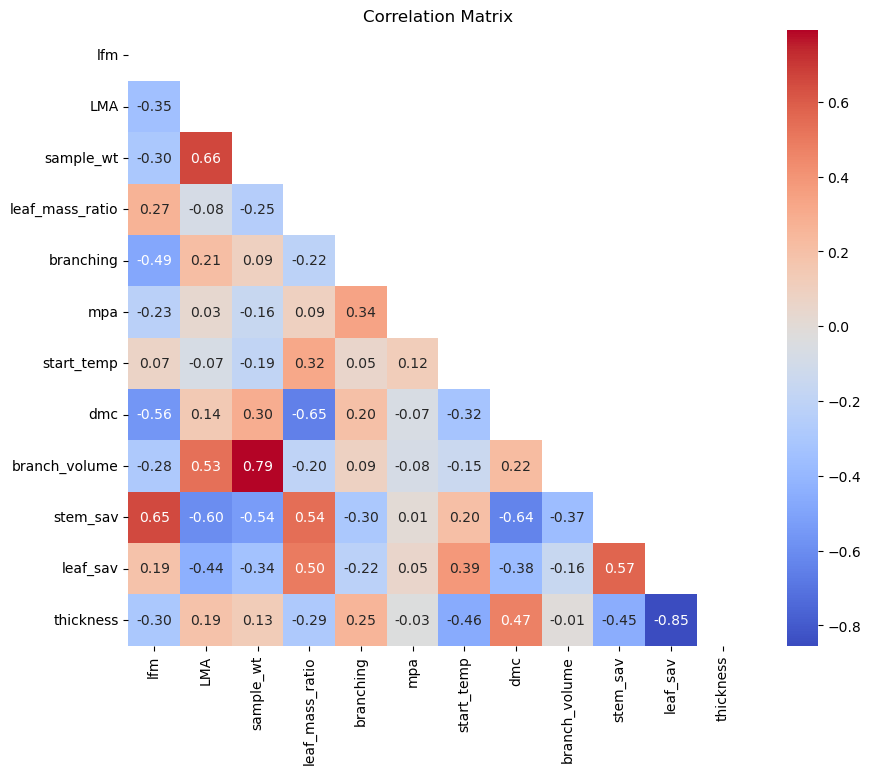

In [3]:
cols_num_use = ['lfm', 'LMA', 'sample_wt', 'leaf_mass_ratio', 'branching', 'mpa', 'start_temp', 'dmc', 'branch_volume', 'stem_sav', 'leaf_sav', 'thickness']

corrplot(flamog, cols_num_use)

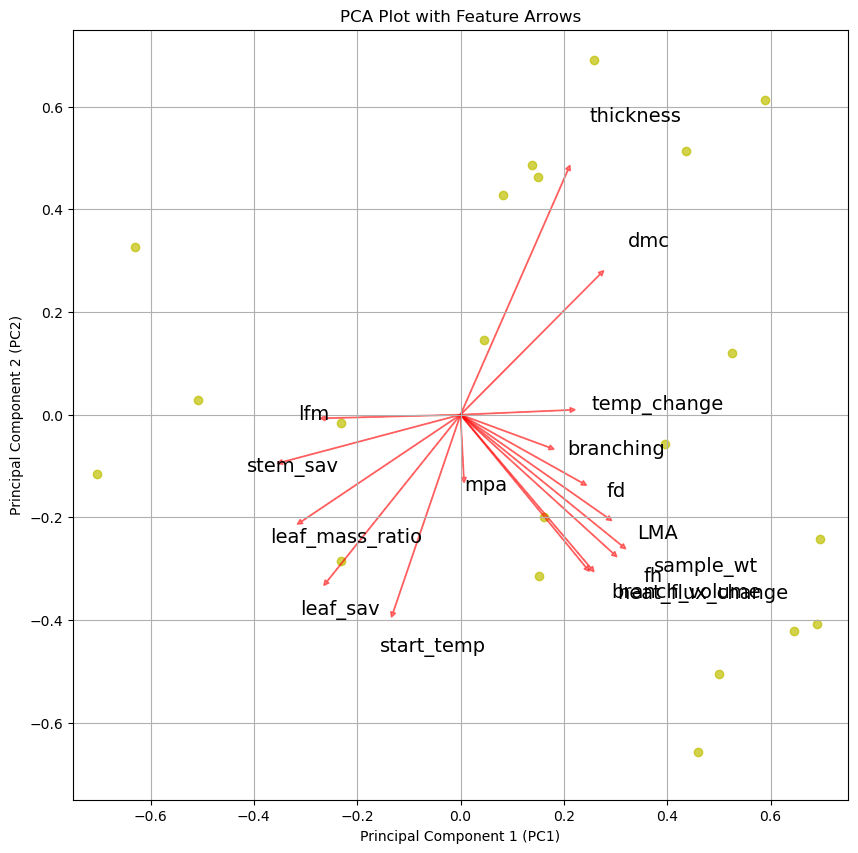

In [4]:
PCAplot(flamog, cols_num_use+['fh','fd','temp_change','heat_flux_change'])

# Modeling Preprocessing

In [5]:
# scale and center
cols_all = ['fh', 'fd', 'temp_change', 'heat_flux_change'] + cols_num_use
flam = scale_and_center(flamog, cols_all, cols_no_change=['plant_id', 'species', 'ignition'])

# declare as factors
flam['species'] = pd.Categorical(flam['species'])
flam['plant_id'] = pd.Categorical(flam['plant_id'])
flam['ignition'] = pd.Categorical(flam['ignition'])

# drop na's
print(len(flam))
cols_all_dpna = cols_all + ['plant_id', 'species', 'ignition']
flam.dropna(subset=cols_all_dpna, inplace=True)
print(len(flam))

# declare all possible IV cols to model
cols_use = cols_num_use + ['species']
print(cols_use)

167
162
['lfm', 'LMA', 'sample_wt', 'leaf_mass_ratio', 'branching', 'mpa', 'start_temp', 'dmc', 'branch_volume', 'stem_sav', 'leaf_sav', 'thickness', 'species']


# Run Model Selector

### NOTE: Random effect is simply `plant_id`
- NO nested effects
- NO `species'

#### It was not possible to test all combinations. Therefore, only combinations of significnt interaction terms and all singletons will be tested.

In [6]:
mxs = len(cols_use) #5
mns = 1
mxi = 5 #5
mni = 1

# Flame Height

In [7]:
yvar='fh'
cols=cols_use
df=flam

compare_predictors_mixedeff(df, cols, yvar)

               cols        aics     pvals         coefs  top_mod
0               mpa  348.953488  0.020467  7.757524e-01     True
1          leaf_sav  348.840407 -0.044770  6.604181e-01     True
2         thickness  348.832041 -0.040855  6.522019e-01     True
3               dmc  348.510981  0.068659  4.682279e-01     True
4   leaf_mass_ratio  347.832781 -0.120260  2.694377e-01     True
5        start_temp  345.657175  0.133740  6.423671e-02    False
6               lfm  344.576424 -0.306653  3.468785e-02    False
7          stem_sav  344.331290 -0.498367  6.173055e-04    False
8               LMA  341.248709  0.391200  2.603875e-03    False
9         branching  339.713739  0.199225  1.947306e-03    False
10          species  338.894950 -0.248310  5.202114e-01    False
11    branch_volume  334.006737  0.253649  6.808868e-05    False
12        sample_wt  306.849369  0.466529  4.664215e-12    False


ERROR: Formula model error: fh ~ leaf_sav*thickness

Columns present in sig. interaction terms: {'leaf_sav', 'thickness', 'dmc', 'mpa'}

Total Num. Cols : Num. Sig. Int. Cols;  13 : 4

Significant Interactions:
('mpa', 'leaf_sav')
('mpa', 'thickness')
('mpa', 'dmc')

Number of formulas: 9728
ERROR: Formula model error: fh ~ mpa*thickness + lfm + LMA + sample_wt + stem_sav + leaf_sav + species


fh ~ mpa*thickness + sample_wt + branching + start_temp + species
fh ~ mpa*leaf_sav + sample_wt + branching + start_temp + species
fh ~ mpa*thickness + sample_wt + branching + start_temp + stem_sav
fh ~ mpa*leaf_sav + sample_wt + branching + start_temp + stem_sav
fh ~ mpa*thickness + sample_wt + branching + start_temp + stem_sav + species
fh ~ mpa*thickness + sample_wt + branching + start_temp + branch_volume + species
fh ~ mpa*dmc + sample_wt + branching + start_temp + species
fh ~ mpa*leaf_sav + sample_wt + branching + start_temp + stem_sav + species
fh ~ mpa*leaf_sav + sample_wt + branching +

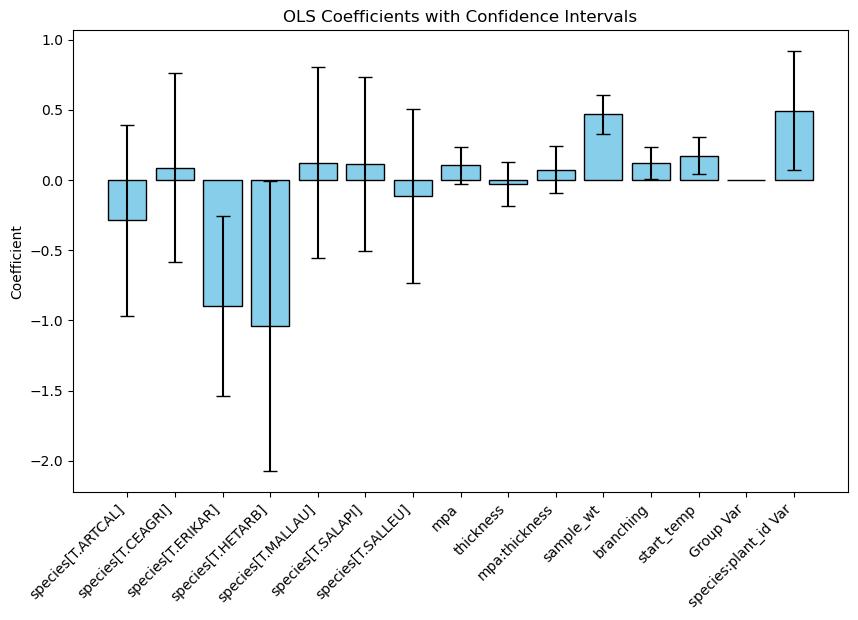

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2240   
Min. group size:      2         Log-Likelihood:       -131.3050
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.213    0.278  0.765 0.444 -0.332  0.757
species[T.ARTCAL]    -0.280    0.357 -0.784 0.433 -0.980  0.420
species[T.CEAGRI]     0.099    0.343  0.288 0.773 -0.574  0.772
species[T.ERIKAR]    -0.897    0.341 -2.628 0.009 -1.566 -0.228
species[T.HETARB]    -1.010    0.526 -1.921 0.055 -2.041  0.021
species[T.MALLAU]     0.146    0.342  0.426 0.670 -0.

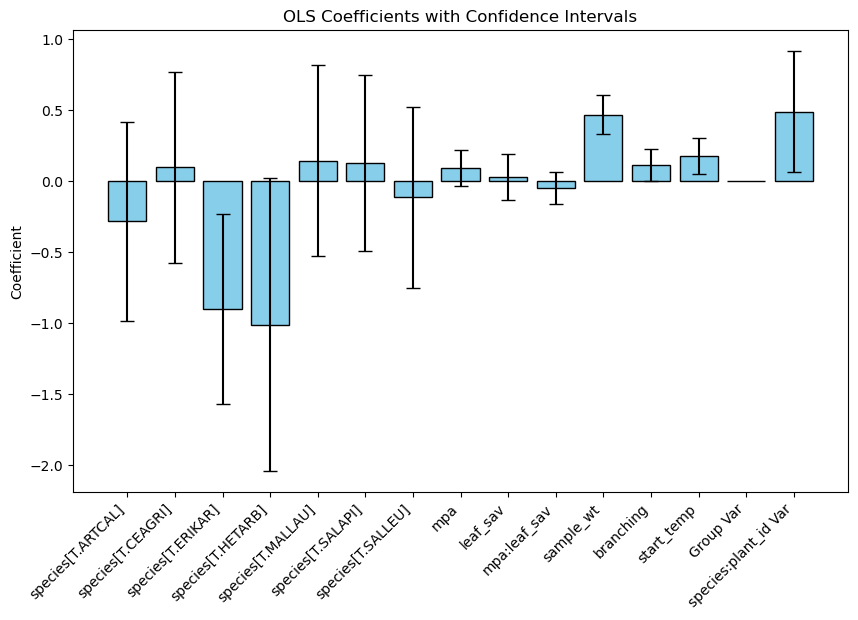

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2345   
Min. group size:      2         Log-Likelihood:       -137.4452
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.015    0.067  0.220 0.826 -0.117  0.146
mpa                   0.118    0.061  1.939 0.052 -0.001  0.237
thickness            -0.020    0.082 -0.247 0.805 -0.181  0.141
mpa:thickness         0.064    0.086  0.746 0.456 -0.104  0.233
sample_wt             0.465    0.062  7.504 0.000  0.344  0.587
branching             0.151    0.056  2.725 0.006  0.

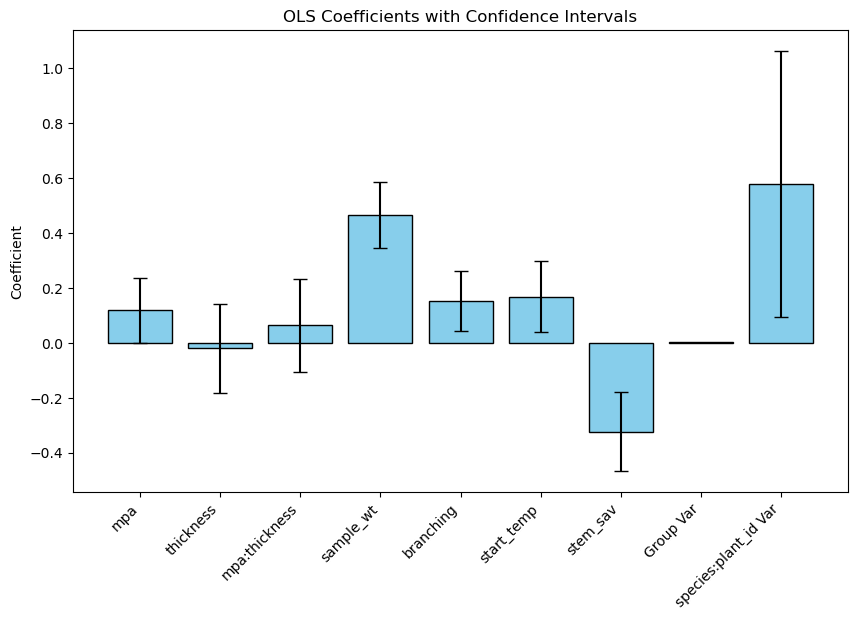

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2302   
Min. group size:      2         Log-Likelihood:       -137.5326
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.016    0.069  0.236 0.814 -0.119  0.152
mpa                   0.109    0.058  1.880 0.060 -0.005  0.223
leaf_sav              0.003    0.084  0.040 0.968 -0.161  0.167
mpa:leaf_sav         -0.047    0.059 -0.803 0.422 -0.162  0.068
sample_wt             0.466    0.062  7.550 0.000  0.345  0.586
branching             0.145    0.055  2.637 0.008  0.

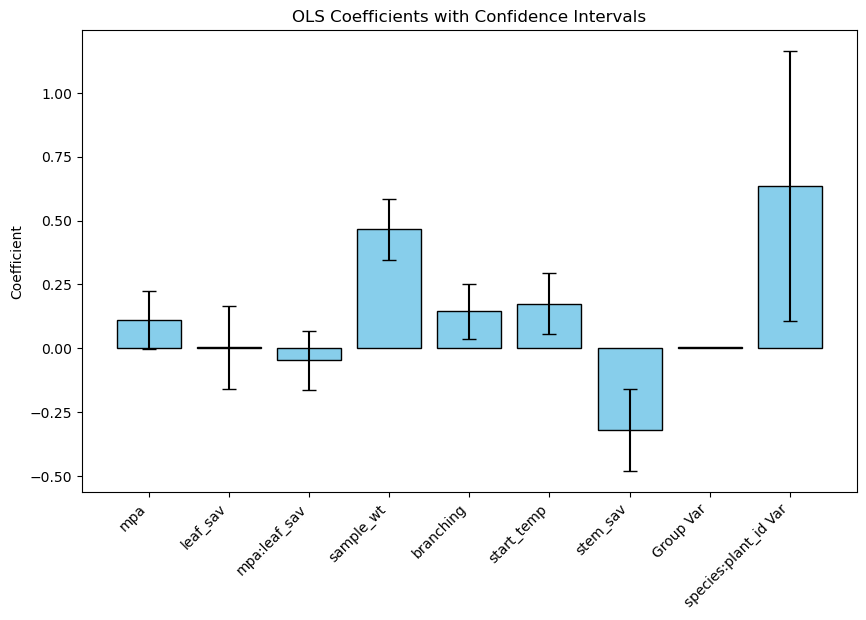

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2231   
Min. group size:      2         Log-Likelihood:       -130.5354
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.328    0.290  1.132 0.258 -0.240  0.897
species[T.ARTCAL]    -0.449    0.375 -1.196 0.232 -1.184  0.287
species[T.CEAGRI]     0.113    0.340  0.331 0.741 -0.555  0.780
species[T.ERIKAR]    -1.463    0.614 -2.383 0.017 -2.666 -0.260
species[T.HETARB]    -0.972    0.527 -1.842 0.065 -2.005  0.062
species[T.MALLAU]     0.184    0.347  0.529 0.597 -0.

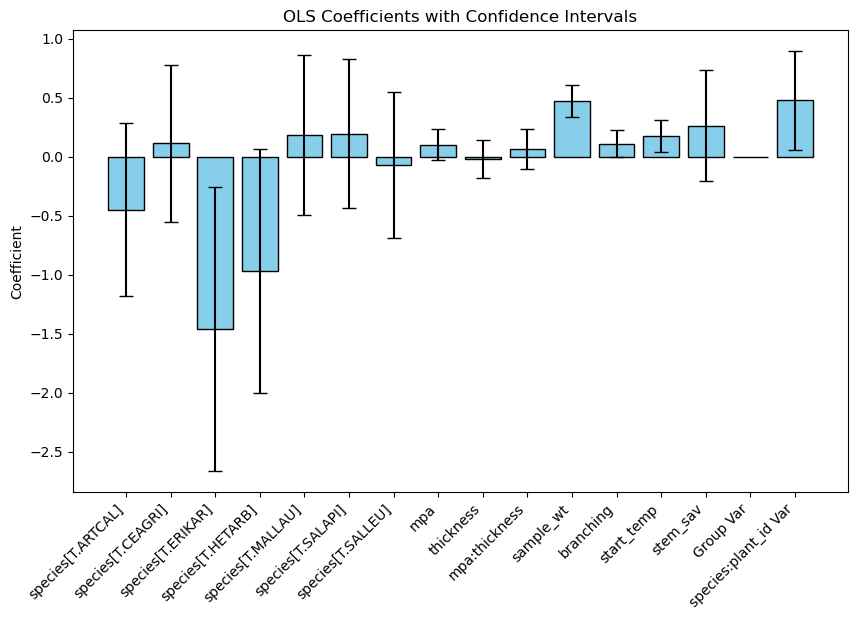

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2272   
Min. group size:      2         Log-Likelihood:       -130.6487
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.195    0.270  0.724 0.469 -0.334  0.724
species[T.ARTCAL]    -0.277    0.340 -0.813 0.416 -0.943  0.390
species[T.CEAGRI]     0.100    0.335  0.300 0.765 -0.557  0.757
species[T.ERIKAR]    -0.867    0.321 -2.696 0.007 -1.497 -0.237
species[T.HETARB]    -0.967    0.526 -1.839 0.066 -1.997  0.064
species[T.MALLAU]     0.187    0.346  0.540 0.589 -0.

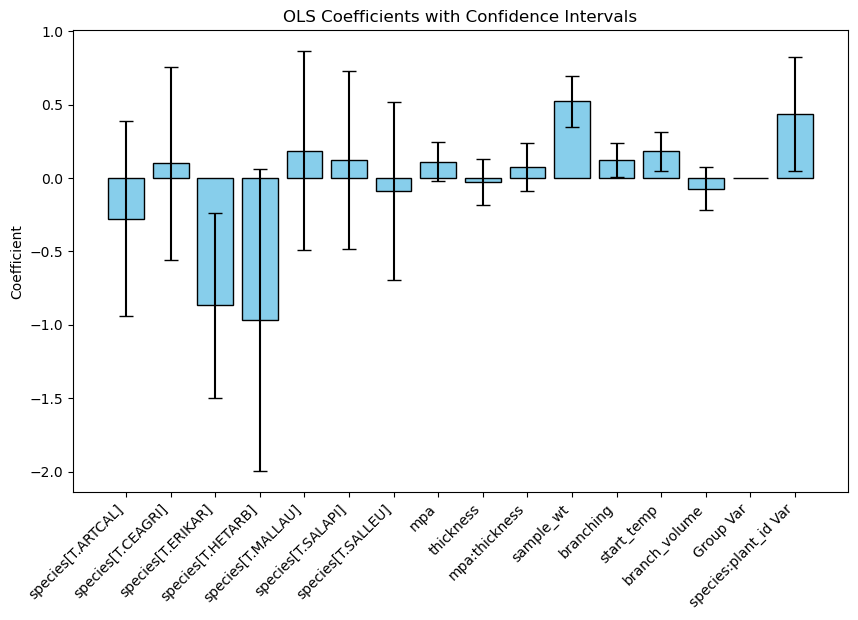

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2251   
Min. group size:      2         Log-Likelihood:       -131.6558
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.145    0.271  0.536 0.592 -0.386  0.677
species[T.ARTCAL]    -0.196    0.334 -0.587 0.557 -0.850  0.459
species[T.CEAGRI]     0.180    0.336  0.536 0.592 -0.478  0.839
species[T.ERIKAR]    -0.809    0.309 -2.615 0.009 -1.415 -0.203
species[T.HETARB]    -0.929    0.529 -1.756 0.079 -1.966  0.108
species[T.MALLAU]     0.203    0.343  0.590 0.555 -0.

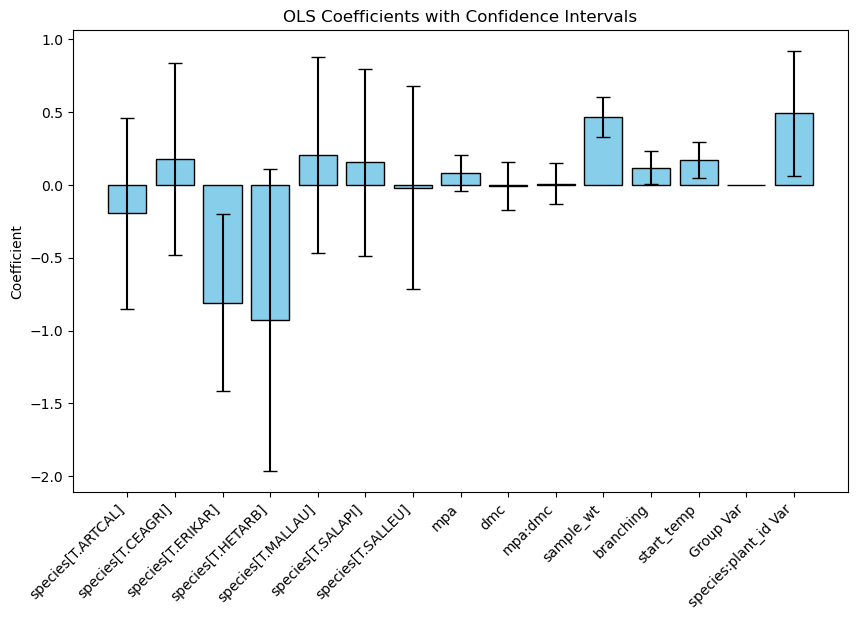

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2231   
Min. group size:      2         Log-Likelihood:       -130.7320
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.304    0.290  1.048 0.294 -0.265  0.873
species[T.ARTCAL]    -0.416    0.378 -1.101 0.271 -1.157  0.325
species[T.CEAGRI]     0.138    0.343  0.403 0.687 -0.534  0.810
species[T.ERIKAR]    -1.437    0.616 -2.331 0.020 -2.645 -0.229
species[T.HETARB]    -0.927    0.529 -1.753 0.080 -1.964  0.109
species[T.MALLAU]     0.216    0.347  0.623 0.533 -0.

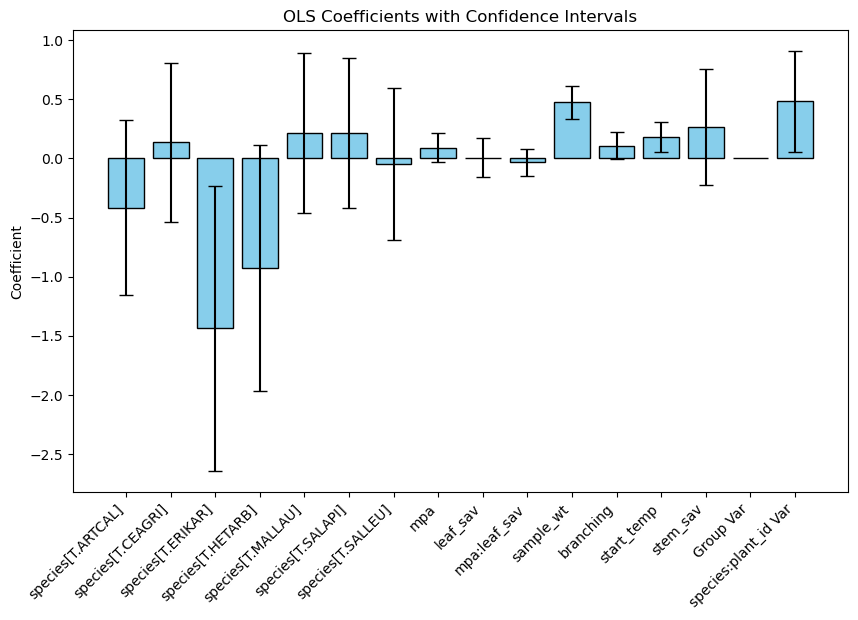

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2283   
Min. group size:      2         Log-Likelihood:       -130.7362
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.191    0.272  0.703 0.482 -0.342  0.724
species[T.ARTCAL]    -0.279    0.349 -0.799 0.424 -0.962  0.405
species[T.CEAGRI]     0.107    0.334  0.322 0.748 -0.547  0.762
species[T.ERIKAR]    -0.877    0.333 -2.637 0.008 -1.529 -0.225
species[T.HETARB]    -0.939    0.523 -1.796 0.073 -1.963  0.086
species[T.MALLAU]     0.208    0.340  0.611 0.541 -0.

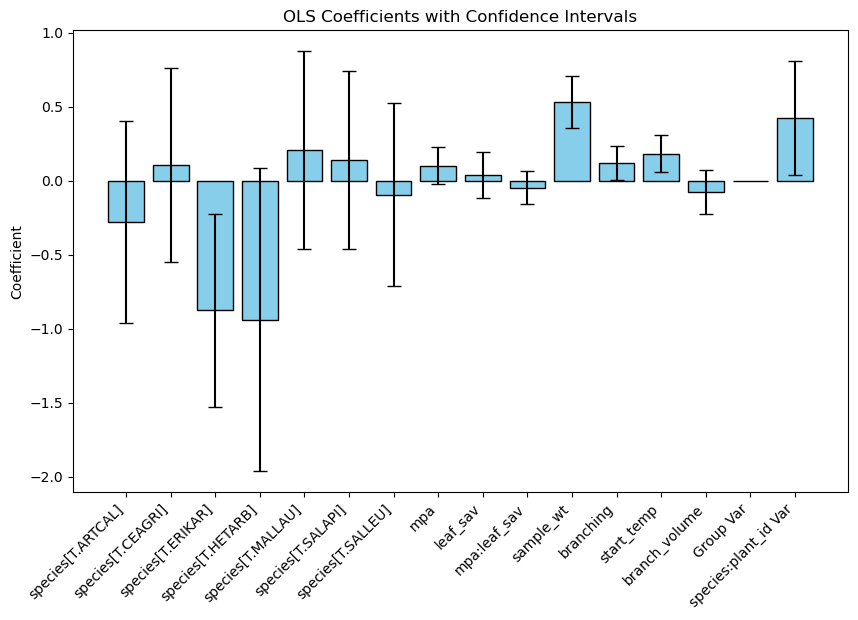

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2287   
Min. group size:      2         Log-Likelihood:       -130.8000
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.302    0.294  1.025 0.305 -0.275  0.878
species[T.ARTCAL]    -0.402    0.366 -1.097 0.272 -1.119  0.316
species[T.CEAGRI]     0.178    0.326  0.545 0.586 -0.462  0.817
species[T.ERIKAR]    -1.473    0.613 -2.402 0.016 -2.674 -0.271
species[T.HETARB]    -0.908    0.521 -1.744 0.081 -1.929  0.113
species[T.MALLAU]     0.227    0.336  0.674 0.500 -0.

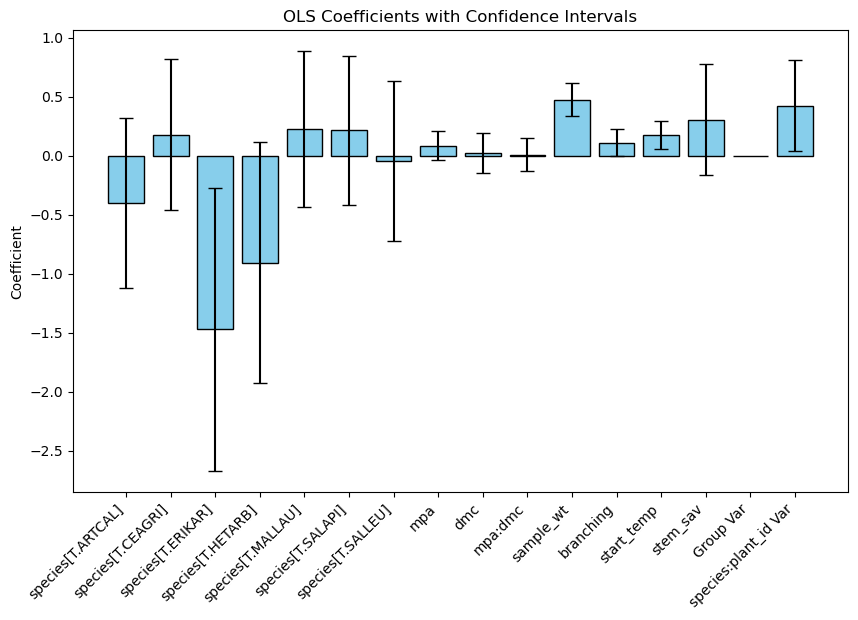

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2274   
Min. group size:      2         Log-Likelihood:       -129.9376
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.305    0.284  1.077 0.282 -0.251  0.861
species[T.ARTCAL]    -0.448    0.366 -1.222 0.222 -1.166  0.270
species[T.CEAGRI]     0.130    0.332  0.393 0.695 -0.520  0.781
species[T.ERIKAR]    -1.465    0.594 -2.464 0.014 -2.630 -0.300
species[T.HETARB]    -0.886    0.526 -1.685 0.092 -1.916  0.144
species[T.MALLAU]     0.258    0.347  0.744 0.457 -0.

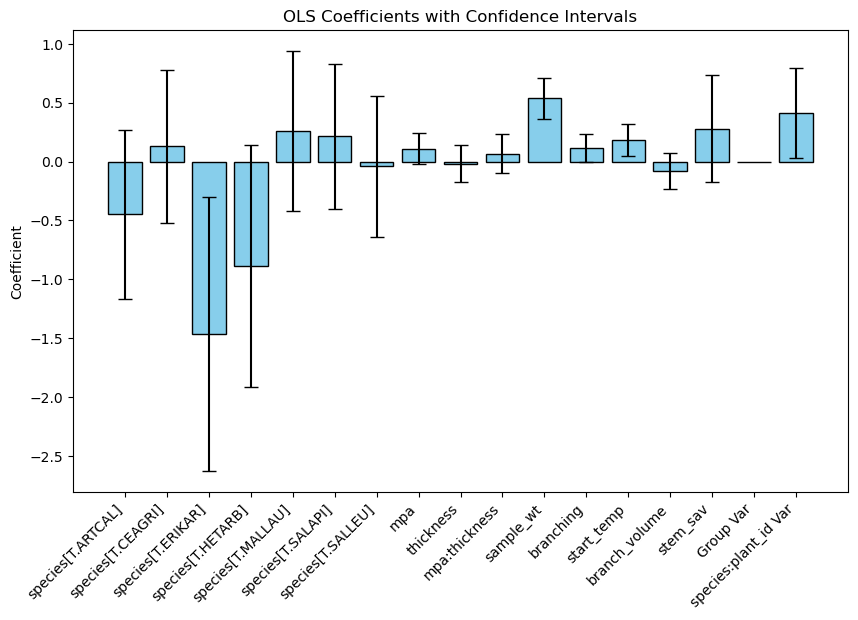

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2302   
Min. group size:      2         Log-Likelihood:       -131.0091
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.327    0.367  0.890 0.374 -0.393  1.046
species[T.ARTCAL]    -0.473    0.549 -0.861 0.389 -1.549  0.604
species[T.CEAGRI]     0.010    0.381  0.026 0.979 -0.737  0.757
species[T.ERIKAR]    -1.061    0.504 -2.103 0.035 -2.050 -0.072
species[T.HETARB]    -1.089    0.532 -2.047 0.041 -2.132 -0.046
species[T.MALLAU]     0.073    0.360  0.202 0.840 -0.

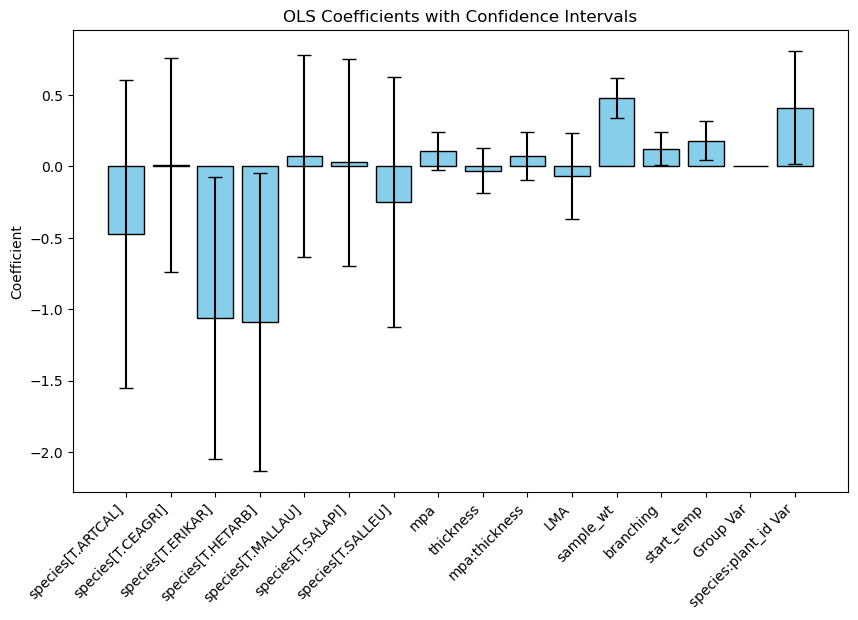

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2258   
Min. group size:      2         Log-Likelihood:       -131.0882
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.220    0.273  0.808 0.419 -0.314  0.755
species[T.ARTCAL]    -0.297    0.359 -0.827 0.408 -1.000  0.406
species[T.CEAGRI]     0.078    0.352  0.222 0.824 -0.611  0.767
species[T.ERIKAR]    -0.874    0.349 -2.501 0.012 -1.559 -0.189
species[T.HETARB]    -1.047    0.528 -1.983 0.047 -2.082 -0.012
species[T.MALLAU]     0.121    0.345  0.351 0.726 -0.

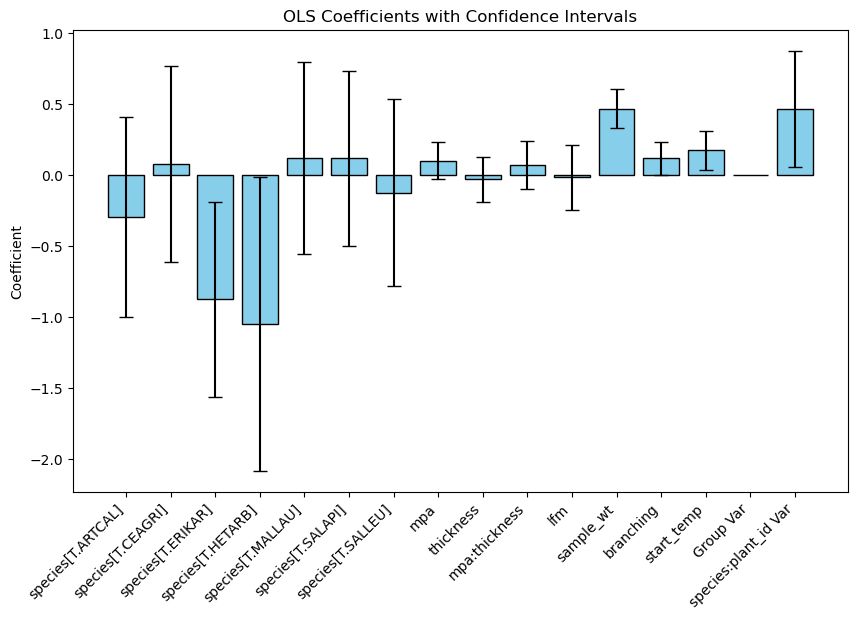

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2319   
Min. group size:      2         Log-Likelihood:       -137.0909
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.015    0.069  0.212 0.832 -0.120  0.149
mpa                   0.122    0.061  1.997 0.046  0.002  0.243
thickness            -0.026    0.082 -0.316 0.752 -0.187  0.135
mpa:thickness         0.068    0.086  0.794 0.427 -0.100  0.236
sample_wt             0.522    0.089  5.842 0.000  0.347  0.697
branching             0.153    0.055  2.754 0.006  0.

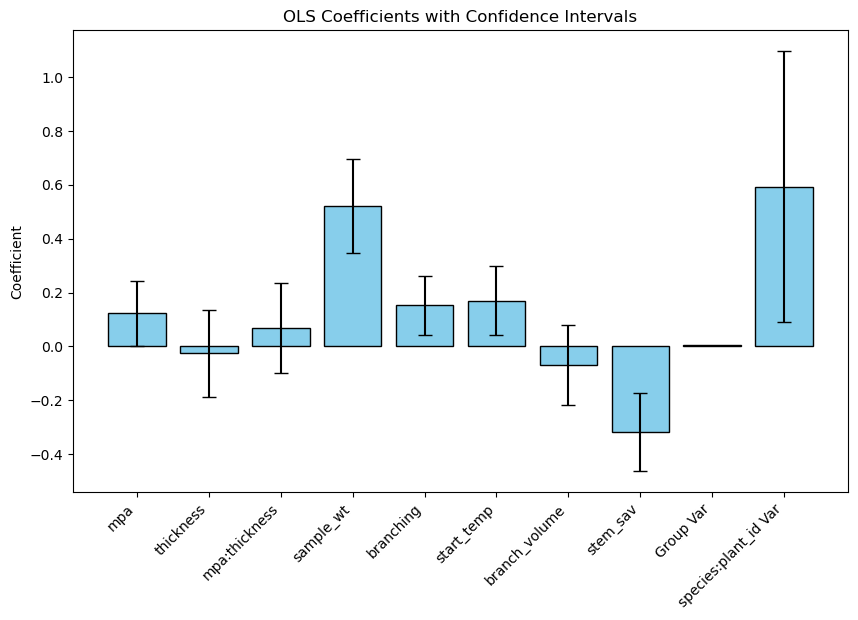

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2252   
Min. group size:      2         Log-Likelihood:       -131.0983
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.237    0.280  0.845 0.398 -0.313  0.786
species[T.ARTCAL]    -0.287    0.345 -0.831 0.406 -0.963  0.390
species[T.CEAGRI]     0.069    0.348  0.200 0.842 -0.612  0.751
species[T.ERIKAR]    -0.884    0.327 -2.700 0.007 -1.526 -0.242
species[T.HETARB]    -1.074    0.541 -1.985 0.047 -2.135 -0.014
species[T.MALLAU]     0.091    0.367  0.248 0.804 -0.

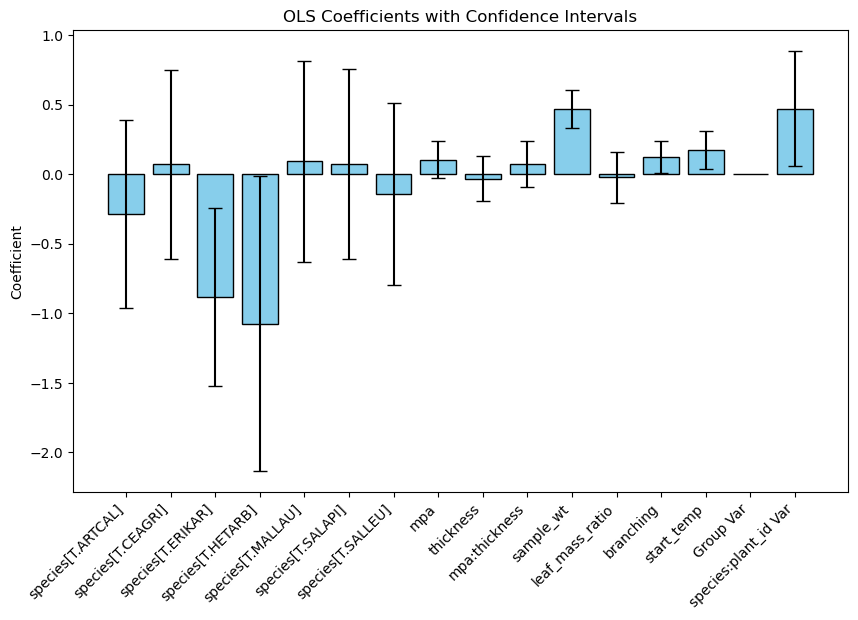

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2281   
Min. group size:      2         Log-Likelihood:       -130.0998
Max. group size:      37        Converged:            Yes      
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.283    0.283  1.003 0.316 -0.271  0.837
species[T.ARTCAL]    -0.420    0.368 -1.142 0.254 -1.141  0.301
species[T.CEAGRI]     0.150    0.333  0.451 0.652 -0.503  0.803
species[T.ERIKAR]    -1.433    0.594 -2.411 0.016 -2.598 -0.268
species[T.HETARB]    -0.848    0.525 -1.615 0.106 -1.877  0.181
species[T.MALLAU]     0.285    0.344  0.829 0.407 -0.

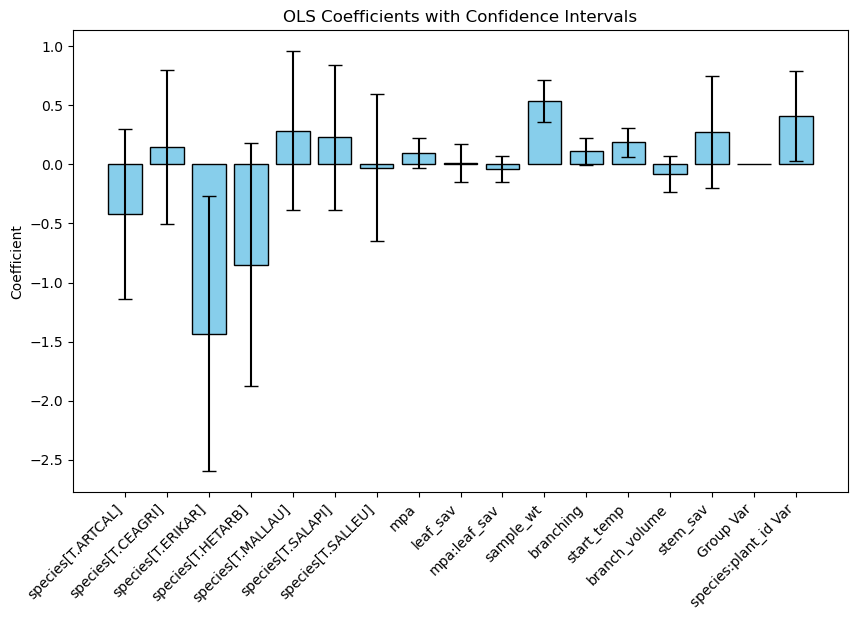

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2267   
Min. group size:      2         Log-Likelihood:       -131.1052
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.221    0.276  0.801 0.423 -0.320  0.762
species[T.ARTCAL]    -0.290    0.357 -0.814 0.416 -0.989  0.409
species[T.CEAGRI]     0.089    0.339  0.263 0.792 -0.574  0.753
species[T.ERIKAR]    -0.898    0.338 -2.652 0.008 -1.561 -0.234
species[T.HETARB]    -1.041    0.524 -1.985 0.047 -2.069 -0.013
species[T.MALLAU]     0.126    0.342  0.368 0.713 -0.

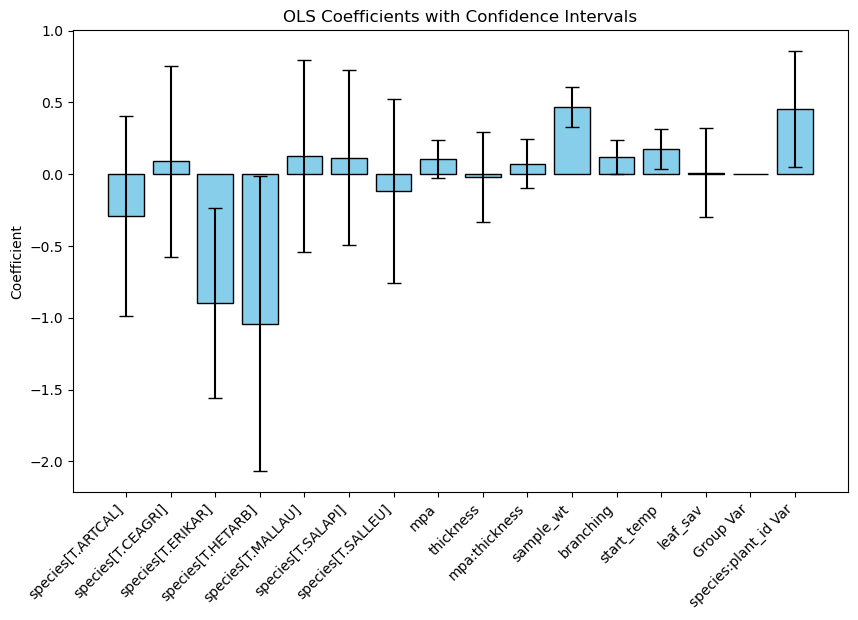

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2350   
Min. group size:      2         Log-Likelihood:       -138.1301
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.012    0.074  0.156 0.876 -0.134  0.157
mpa                   0.103    0.058  1.772 0.076 -0.011  0.217
dmc                  -0.026    0.076 -0.345 0.730 -0.176  0.123
mpa:dmc               0.015    0.073  0.208 0.835 -0.128  0.158
sample_wt             0.463    0.063  7.355 0.000  0.340  0.586
branching             0.150    0.055  2.729 0.006  0.

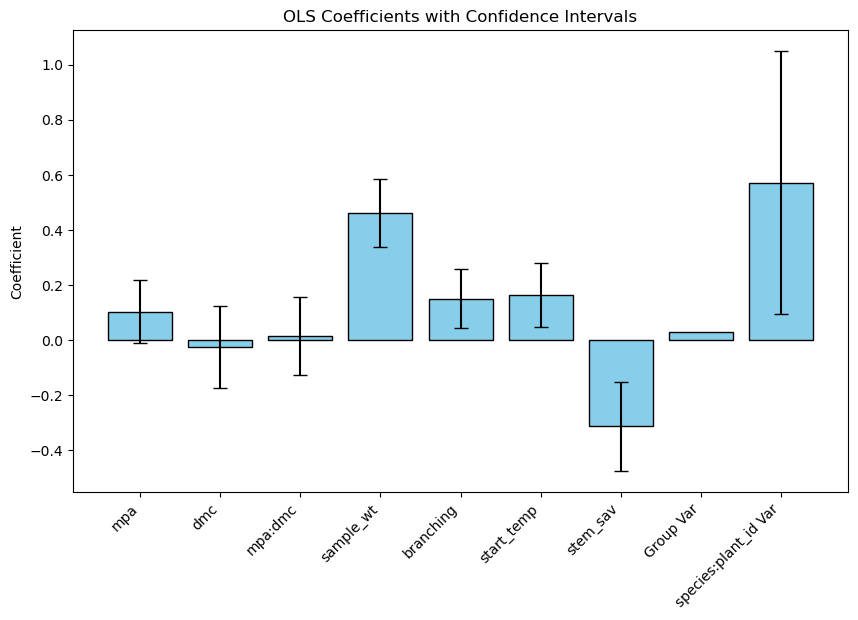

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   fh       
No. Observations:     162       Method:               ML       
No. Groups:           8         Scale:                0.2231   
Min. group size:      2         Log-Likelihood:       -131.1509
Max. group size:      37        Converged:            No       
Mean group size:      20.2                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.231    0.288  0.805 0.421 -0.332  0.795
species[T.ARTCAL]    -0.292    0.350 -0.836 0.403 -0.978  0.393
species[T.CEAGRI]     0.078    0.352  0.221 0.825 -0.612  0.767
species[T.ERIKAR]    -0.899    0.329 -2.734 0.006 -1.543 -0.254
species[T.HETARB]    -1.055    0.545 -1.937 0.053 -2.123  0.012
species[T.MALLAU]     0.111    0.364  0.306 0.760 -0.

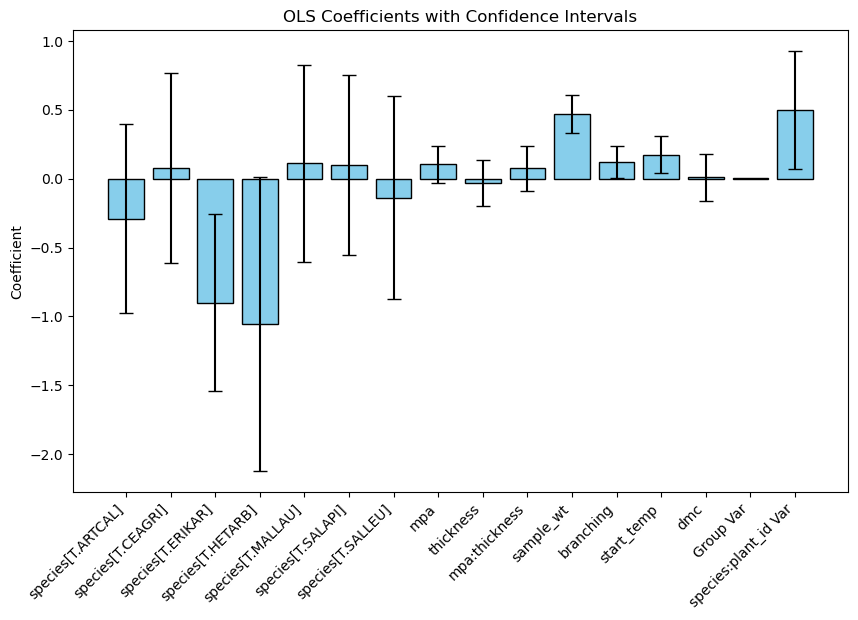

In [8]:
AIC_iterator(flam, cols_use, Y_VAR='fh',
            minnumsingle=mns, maxnumsingle=mxs, minnumint=mni, maxnumint=mxi)

# Flame Duration

In [9]:
yvar='fd'
cols=cols_use
df=flam
compare_predictors_mixedeff(df, cols, yvar)

               cols        aics     pvals         coefs  top_mod
0           species  451.016860 -0.382953  5.361410e-01     True
1               mpa  446.750330 -0.045917  6.229635e-01    False
2        start_temp  446.445675 -0.046927  5.914359e-01    False
3         thickness  445.980840  0.065724  4.658912e-01    False
4         branching  445.895056  0.145043  1.196389e-01    False
5          leaf_sav  445.496714 -0.092000  3.336763e-01    False
6               LMA  444.851697  0.305154  1.408714e-02    False
7               lfm  444.134673 -0.255362  5.476824e-02    False
8   leaf_mass_ratio  443.949117 -0.241753  2.874643e-02    False
9          stem_sav  442.180284 -0.349600  9.230438e-03    False
10    branch_volume  435.619538  0.317514  4.464033e-04    False
11              dmc  435.194484  0.409251  2.901647e-04    False
12        sample_wt  420.165104  0.484080  4.249122e-08    False


ERROR: Formula model error: fd ~ leaf_sav*thickness

Columns present in sig. interaction terms: {'thickness', 'species', 'start_temp', 'mpa'}

Total Num. Cols : Num. Sig. Int. Cols;  13 : 4

Significant Interactions:
('mpa', 'species')
('start_temp', 'species')
('thickness', 'species')

Number of formulas: 9728
ERROR: Formula model error: fd ~ mpa*species + sample_wt + leaf_mass_ratio + branch_volume + leaf_sav
ERROR: Formula model error: fd ~ mpa*species + sample_wt + branching + start_temp + dmc
ERROR: Formula model error: fd ~ mpa*species + lfm + sample_wt + leaf_mass_ratio + branching + start_temp + thickness
ERROR: Formula model error: fd ~ mpa*species + lfm + sample_wt + leaf_mass_ratio + start_temp + stem_sav + thickness
ERROR: Formula model error: fd ~ mpa*species + lfm + sample_wt + start_temp + branch_volume + stem_sav + thickness
ERROR: Formula model error: fd ~ start_temp*species + thickness*species + lfm + branching + mpa + dmc + stem_sav
ERROR: Formula model error: fd ~ m

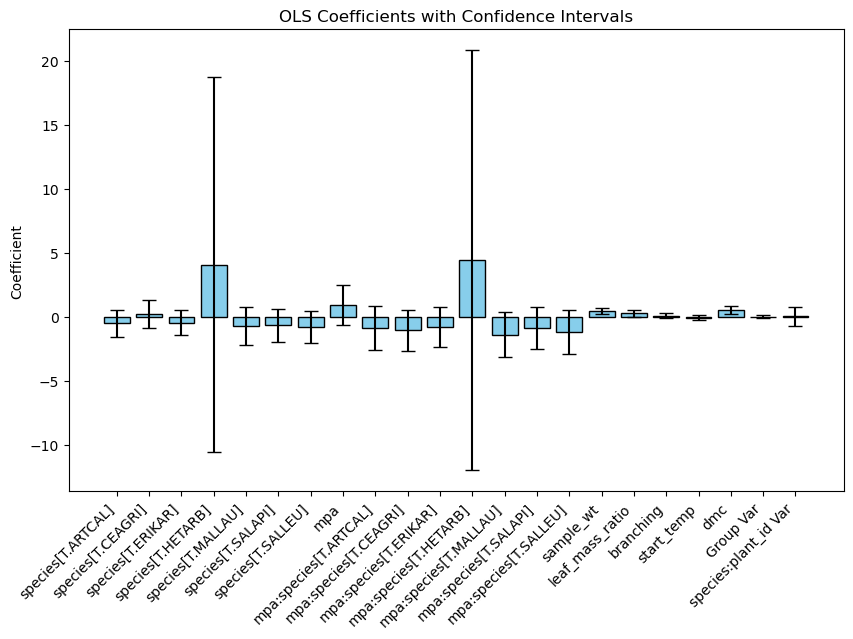

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5793   
Min. group size:      2          Log-Likelihood:        -187.4223
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.440    0.559  0.788 0.431  -0.655  1.535
species[T.ARTCAL]     -0.464    0.585 -0.793 0.428  -1.611  0.683
species[T.CEAGRI]      0.181    0.541  0.334 0.738  -0.879  1.241
species[T.ERIKAR]     -0.377    0.525 -0.718 0.473  -1.406  0.652
species[T.HETARB]      3.786    7.479  0.506 0.613 -10.872 18.444
species[T.MALLAU]     -0

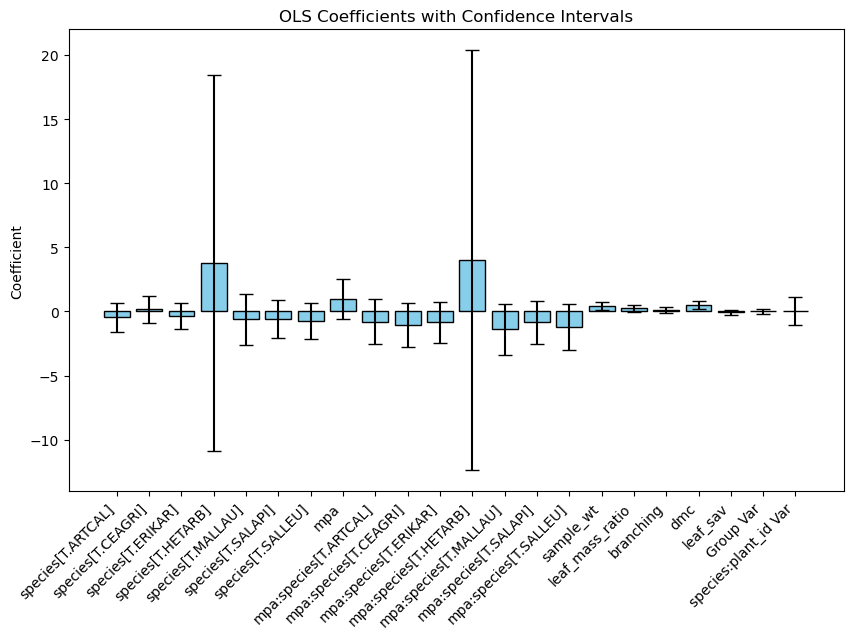

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5892   
Min. group size:      2          Log-Likelihood:        -188.6050
Max. group size:      37         Converged:             No       
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.522    0.503  1.037 0.300  -0.465  1.508
species[T.ARTCAL]     -0.528    0.557 -0.948 0.343  -1.619  0.564
species[T.CEAGRI]      0.150    0.554  0.271 0.786  -0.935  1.236
species[T.ERIKAR]     -0.505    0.522 -0.968 0.333  -1.528  0.517
species[T.HETARB]      3.363    7.428  0.453 0.651 -11.196 17.922
species[T.MALLAU]     -0

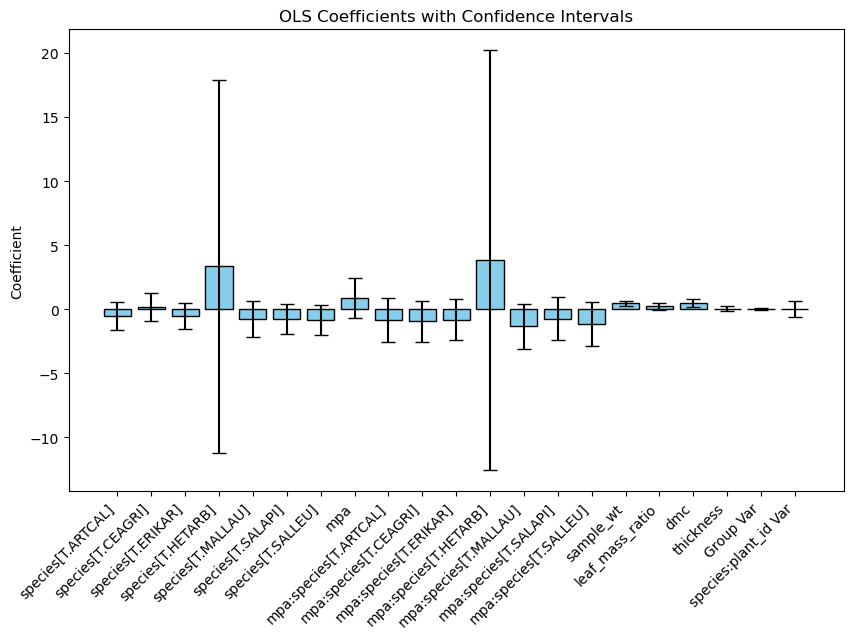

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5774   
Min. group size:      2          Log-Likelihood:        -187.6344
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.472    0.527  0.896 0.370  -0.560  1.504
species[T.ARTCAL]     -0.528    0.557 -0.948 0.343  -1.621  0.564
species[T.CEAGRI]      0.168    0.544  0.309 0.758  -0.898  1.234
species[T.ERIKAR]     -0.431    0.518 -0.831 0.406  -1.447  0.585
species[T.HETARB]      3.660    7.443  0.492 0.623 -10.928 18.248
species[T.MALLAU]     -0

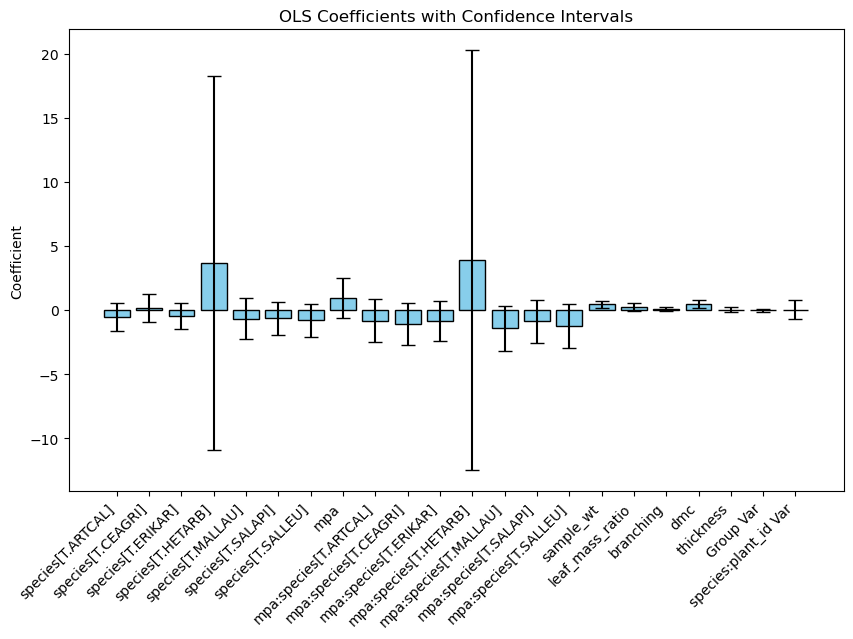

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5808   
Min. group size:      2          Log-Likelihood:        -187.7955
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.556    0.496  1.120 0.263  -0.417  1.529
species[T.ARTCAL]     -0.521    0.542 -0.961 0.337  -1.584  0.542
species[T.CEAGRI]      0.196    0.546  0.358 0.720  -0.875  1.267
species[T.ERIKAR]     -0.541    0.513 -1.054 0.292  -1.547  0.465
species[T.HETARB]      3.768    7.452  0.506 0.613 -10.838 18.373
species[T.MALLAU]     -0

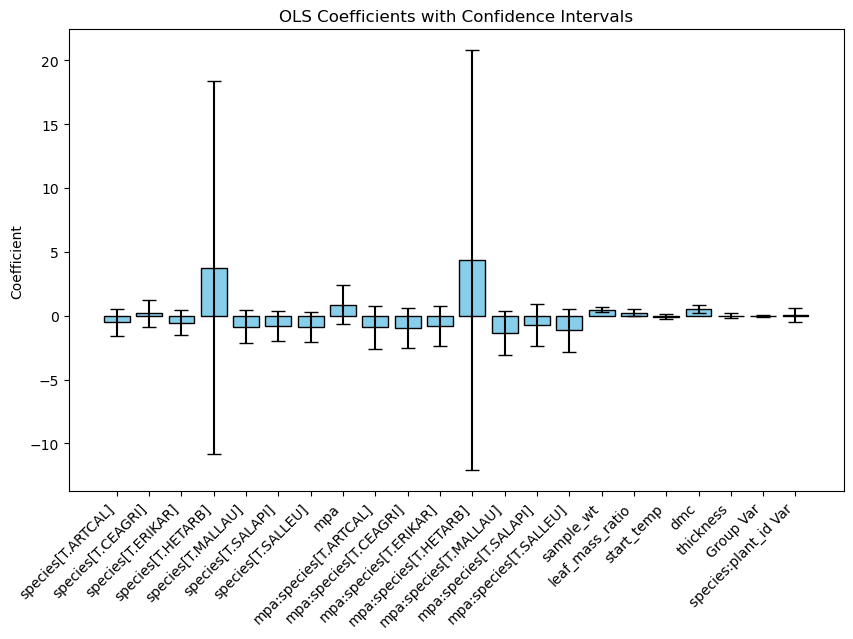

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5860   
Min. group size:      2          Log-Likelihood:        -187.9139
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.509    0.499  1.020 0.308  -0.469  1.487
species[T.ARTCAL]     -0.485    0.556 -0.872 0.383  -1.575  0.605
species[T.CEAGRI]      0.146    0.545  0.268 0.789  -0.921  1.214
species[T.ERIKAR]     -0.472    0.519 -0.909 0.364  -1.489  0.546
species[T.HETARB]      3.443    7.431  0.463 0.643 -11.122 18.009
species[T.MALLAU]     -0

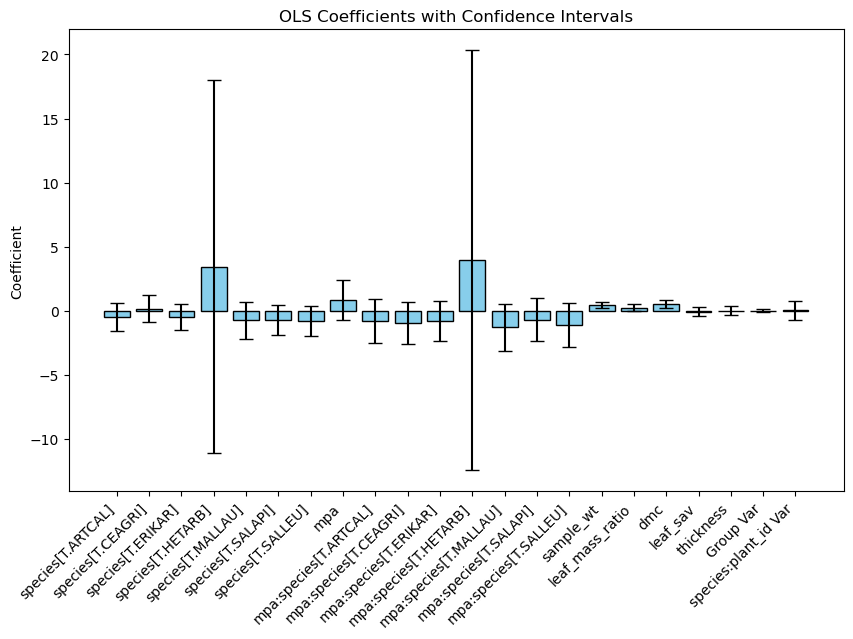

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5843   
Min. group size:      2          Log-Likelihood:        -187.9389
Max. group size:      37         Converged:             No       
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.519    0.497  1.043 0.297  -0.456  1.493
species[T.ARTCAL]     -0.566    0.554 -1.020 0.308  -1.652  0.521
species[T.CEAGRI]      0.133    0.546  0.243 0.808  -0.938  1.203
species[T.ERIKAR]     -0.439    0.547 -0.802 0.422  -1.511  0.633
species[T.HETARB]      3.485    7.442  0.468 0.640 -11.102 18.071
species[T.MALLAU]     -0

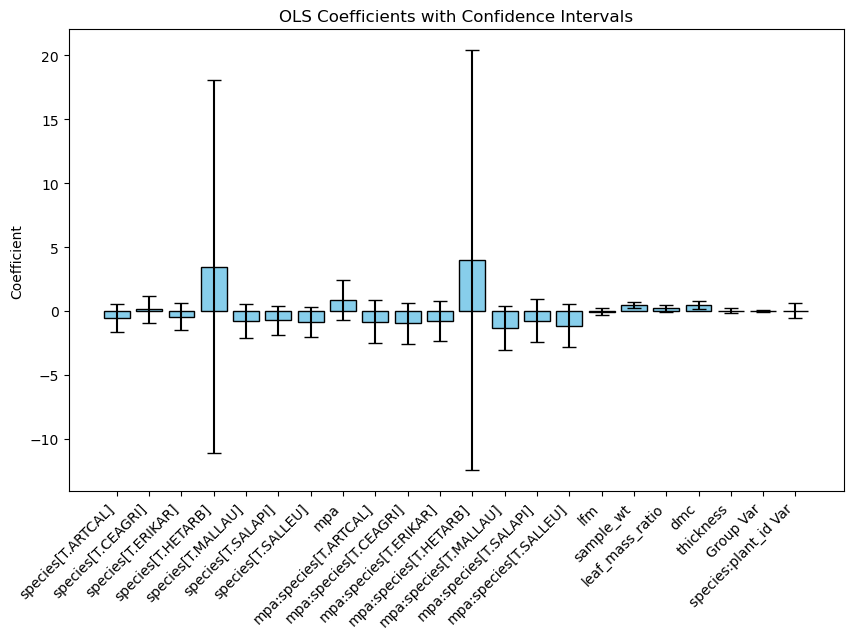

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5829   
Min. group size:      2          Log-Likelihood:        -187.9826
Max. group size:      37         Converged:             No       
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.382    0.605  0.632 0.528  -0.803  1.568
species[T.ARTCAL]     -0.226    0.785 -0.288 0.773  -1.765  1.312
species[T.CEAGRI]      0.326    0.605  0.539 0.590  -0.859  1.511
species[T.ERIKAR]     -0.280    0.713 -0.392 0.695  -1.676  1.117
species[T.HETARB]      4.203    7.499  0.560 0.575 -10.494 18.900
species[T.MALLAU]     -0

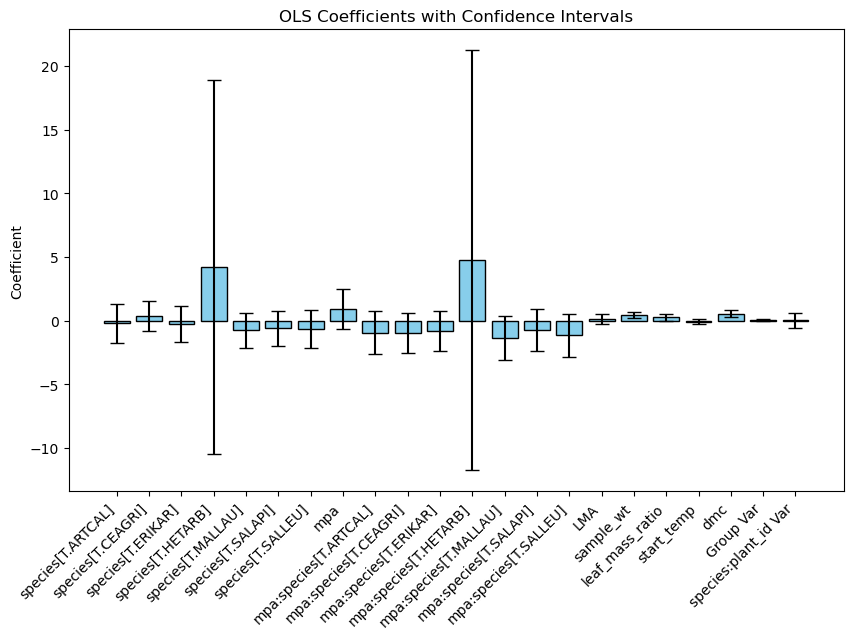

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5802   
Min. group size:      2          Log-Likelihood:        -188.0158
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.344    0.634  0.543 0.587  -0.899  1.587
species[T.ARTCAL]     -0.233    0.834 -0.279 0.780  -1.868  1.402
species[T.CEAGRI]      0.283    0.602  0.470 0.639  -0.897  1.462
species[T.ERIKAR]     -0.226    0.759 -0.299 0.765  -1.714  1.261
species[T.HETARB]      3.686    7.479  0.493 0.622 -10.971 18.344
species[T.MALLAU]     -0

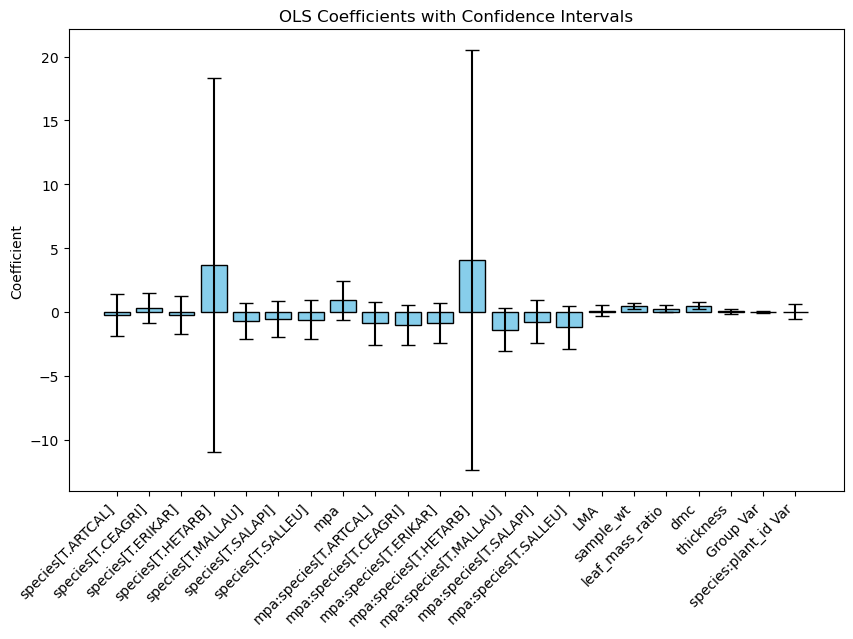

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.6037   
Min. group size:      2          Log-Likelihood:        -189.0979
Max. group size:      37         Converged:             No       
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.592    0.493  1.201 0.230  -0.374  1.559
species[T.ARTCAL]     -0.525    0.543 -0.968 0.333  -1.589  0.539
species[T.CEAGRI]     -0.000    0.559 -0.000 1.000  -1.096  1.095
species[T.ERIKAR]     -0.448    0.516 -0.868 0.385  -1.459  0.563
species[T.HETARB]      1.909    7.903  0.242 0.809 -13.579 17.398
species[T.MALLAU]     -0

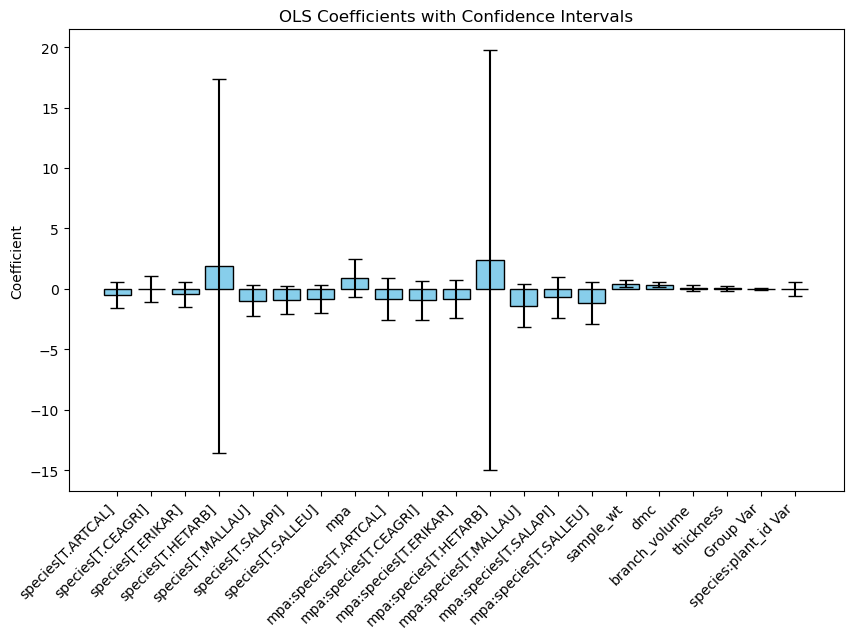

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5805   
Min. group size:      2          Log-Likelihood:        -188.1082
Max. group size:      37         Converged:             No       
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.530    0.496  1.069 0.285  -0.442  1.501
species[T.ARTCAL]     -0.534    0.546 -0.979 0.327  -1.604  0.535
species[T.CEAGRI]      0.149    0.549  0.272 0.786  -0.927  1.225
species[T.ERIKAR]     -0.506    0.512 -0.988 0.323  -1.510  0.498
species[T.HETARB]      3.204    7.868  0.407 0.684 -12.217 18.625
species[T.MALLAU]     -0

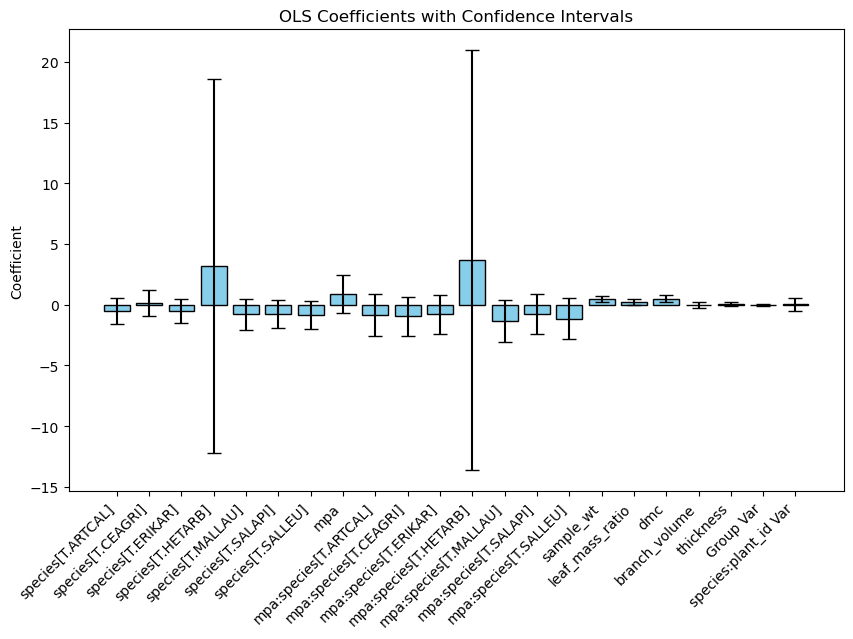

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5781   
Min. group size:      2          Log-Likelihood:        -187.2890
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.510    0.557  0.916 0.360  -0.582  1.602
species[T.ARTCAL]     -0.552    0.600 -0.919 0.358  -1.728  0.625
species[T.CEAGRI]      0.185    0.541  0.342 0.732  -0.875  1.245
species[T.ERIKAR]     -0.674    0.798 -0.844 0.398  -2.237  0.890
species[T.HETARB]      3.759    7.440  0.505 0.613 -10.822 18.341
species[T.MALLAU]     -0

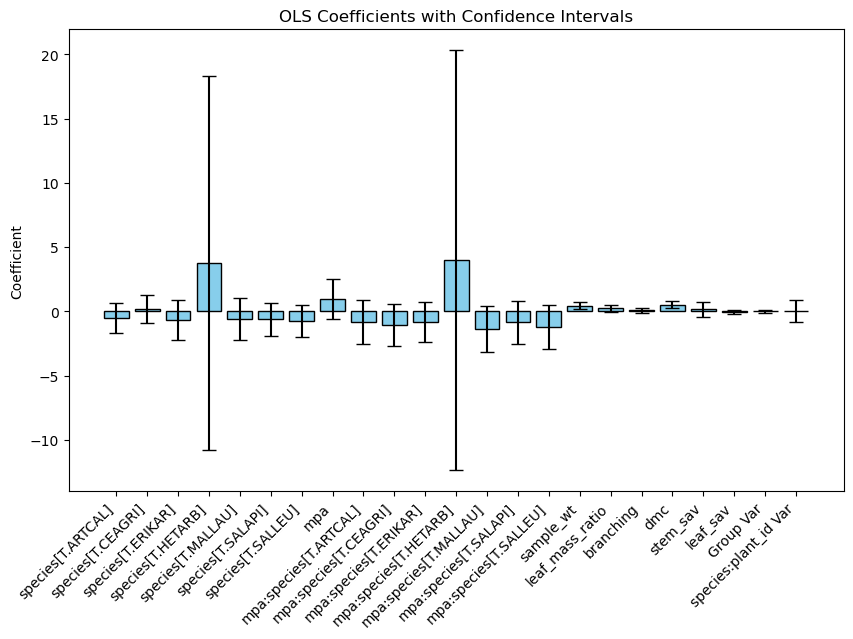

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    fd       
No. Observations:     162        Method:                ML       
No. Groups:           8          Scale:                 0.5765   
Min. group size:      2          Log-Likelihood:        -187.2948
Max. group size:      37         Converged:             Yes      
Mean group size:      20.2                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.563    0.534  1.055 0.291  -0.483  1.610
species[T.ARTCAL]     -0.600    0.568 -1.058 0.290  -1.713  0.512
species[T.CEAGRI]      0.210    0.545  0.386 0.700  -0.858  1.278
species[T.ERIKAR]     -0.720    0.780 -0.924 0.355  -2.248  0.807
species[T.HETARB]      4.046    7.457  0.543 0.587 -10.569 18.660
species[T.MALLAU]     -0

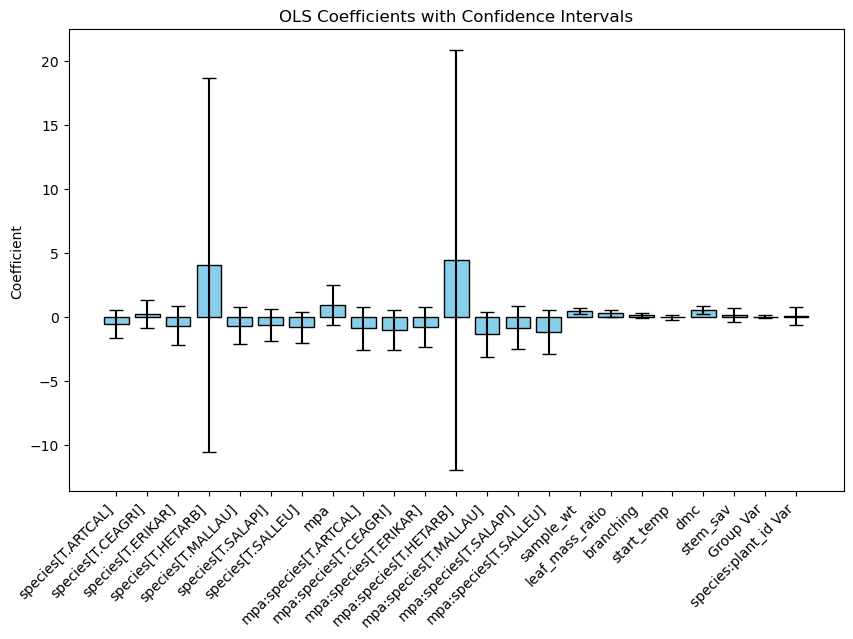

In [10]:
AIC_iterator(flam, cols_use, Y_VAR='fd',
            minnumsingle=mns, maxnumsingle=mxs, minnumint=mni, maxnumint=mxi)

# Temp Change

In [11]:
yvar='temp_change'
cols=cols_use
df=flam
compare_predictors_mixedeff(df, cols, yvar)

               cols        aics     pvals         coefs  top_mod
0               LMA  304.534939  0.097680  4.176065e-01     True
1               dmc  303.949995  0.089897  2.708376e-01     True
2     branch_volume  303.464900  0.077979  1.971672e-01     True
3   leaf_mass_ratio  302.284645 -0.167626  7.418627e-02    False
4         thickness  302.081699  0.138460  7.364841e-02    False
5          leaf_sav  302.043892 -0.150075  7.109881e-02    False
6           species  301.769198 -0.477024  1.651199e-01    False
7               lfm  301.232764 -0.197459  4.315243e-02    False
8          stem_sav  300.585701 -0.254306  2.181084e-03    False
9               mpa  300.174135  0.140693  2.528577e-02    False
10        sample_wt  296.458956  0.210282  3.440285e-03    False
11        branching  296.043031  0.171873  2.301602e-03    False
12       start_temp  272.278944 -0.350094  5.298375e-10    False


ERROR: Formula model error: temp_change ~ leaf_sav*thickness

Columns present in sig. interaction terms: {'leaf_mass_ratio', 'species', 'LMA'}

Total Num. Cols : Num. Sig. Int. Cols;  13 : 3

Significant Interactions:
('leaf_mass_ratio', 'species')
('LMA', 'species')

Number of formulas: 5120
ERROR: Formula model error: temp_change ~ LMA*species + leaf_mass_ratio
ERROR: Formula model error: temp_change ~ LMA*species + start_temp
ERROR: Formula model error: temp_change ~ LMA*species + branching + start_temp
ERROR: Formula model error: temp_change ~ LMA*species + mpa + dmc
ERROR: Formula model error: temp_change ~ LMA*species + dmc + branch_volume
ERROR: Formula model error: temp_change ~ LMA*species + lfm + sample_wt + dmc
ERROR: Formula model error: temp_change ~ LMA*species + sample_wt + branch_volume + leaf_sav
ERROR: Formula model error: temp_change ~ LMA*species + branching + leaf_sav + thickness
ERROR: Formula model error: temp_change ~ LMA*species + mpa + start_temp + leaf_sav
ER

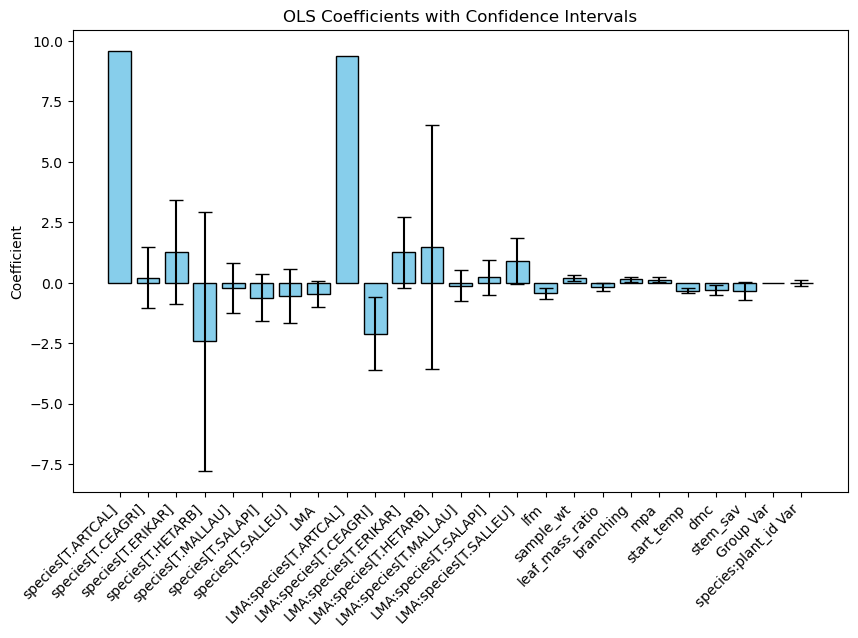

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   temp_change
No. Observations:    162       Method:               ML         
No. Groups:          8         Scale:                0.2113     
Min. group size:     2         Log-Likelihood:       -104.2175  
Max. group size:     37        Converged:            Yes        
Mean group size:     20.2                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.555    0.477  1.165 0.244 -0.379  1.490
species[T.ARTCAL]     -0.948                                    
species[T.CEAGRI]      0.208    0.651  0.320 0.749 -1.067  1.484
species[T.ERIKAR]      0.019    0.815  0.023 0.982 -1.579  1.616
species[T.HETARB]     -2.082    2.723 -0.765 0.444 -7.418  3.254
species[T.MALLAU]     -0.088    0.524 -

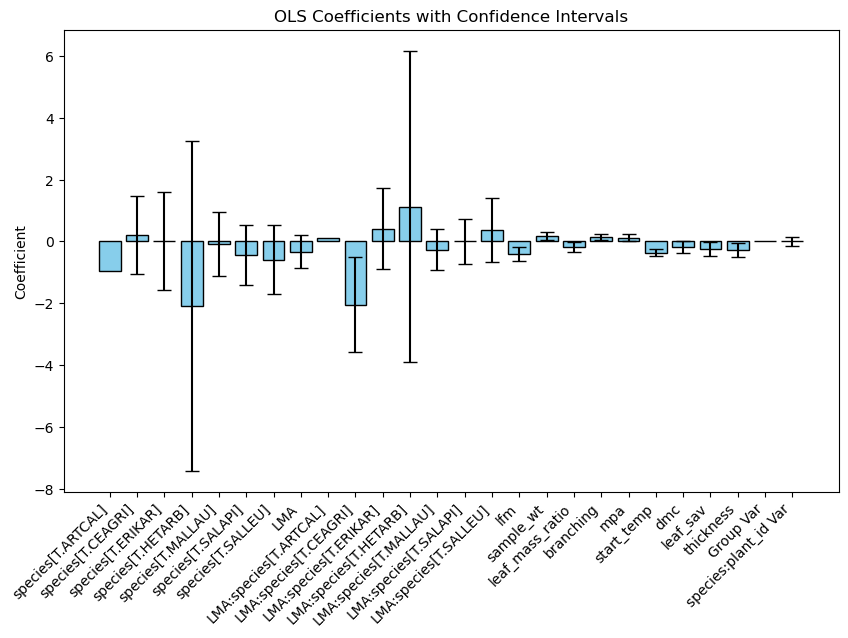

                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        temp_change
No. Observations:          162            Method:                    ML         
No. Groups:                8              Scale:                     0.2061     
Min. group size:           2              Log-Likelihood:            -103.2896  
Max. group size:           37             Converged:                 Yes        
Mean group size:           20.2                                                 
--------------------------------------------------------------------------------
                      Coef.    Std.Err.    z    P>|z|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept              0.500       0.476  1.049 0.294        -0.434        1.434
species[T.ARTCAL]     -0.583 6629599.260 -0.000 1.000 -12993776.365 12993775.200
species[T.CEAGRI]      0.128       0.656  0.195 0.

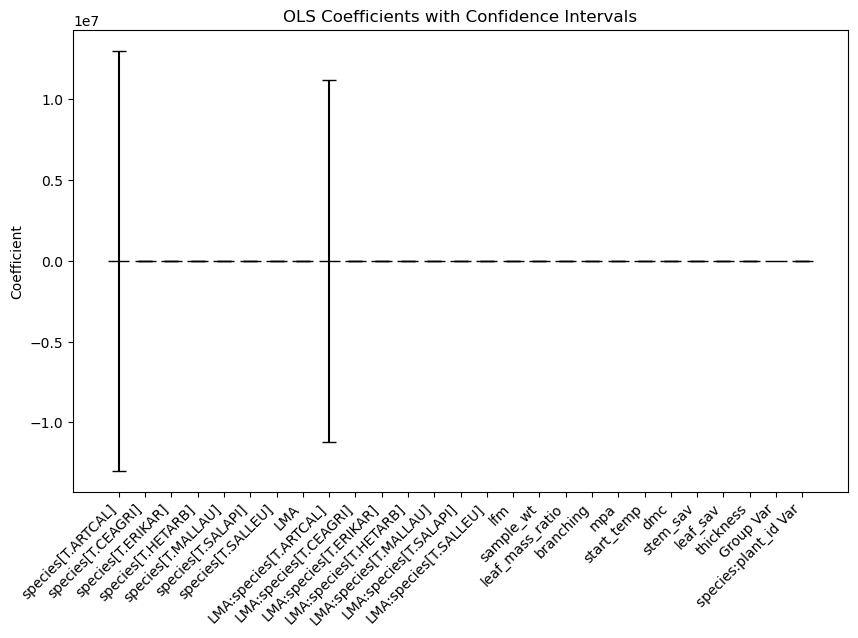

                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        temp_change
No. Observations:          162            Method:                    ML         
No. Groups:                8              Scale:                     0.2004     
Min. group size:           2              Log-Likelihood:            -105.9320  
Max. group size:           37             Converged:                 Yes        
Mean group size:           20.2                                                 
--------------------------------------------------------------------------------
                      Coef.    Std.Err.    z    P>|z|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept              0.551       0.486  1.134 0.257        -0.402        1.504
species[T.ARTCAL]      1.401 9042864.424  0.000 1.000 -17723687.188 17723689.989
species[T.CEAGRI]      0.123       0.695  0.177 0.

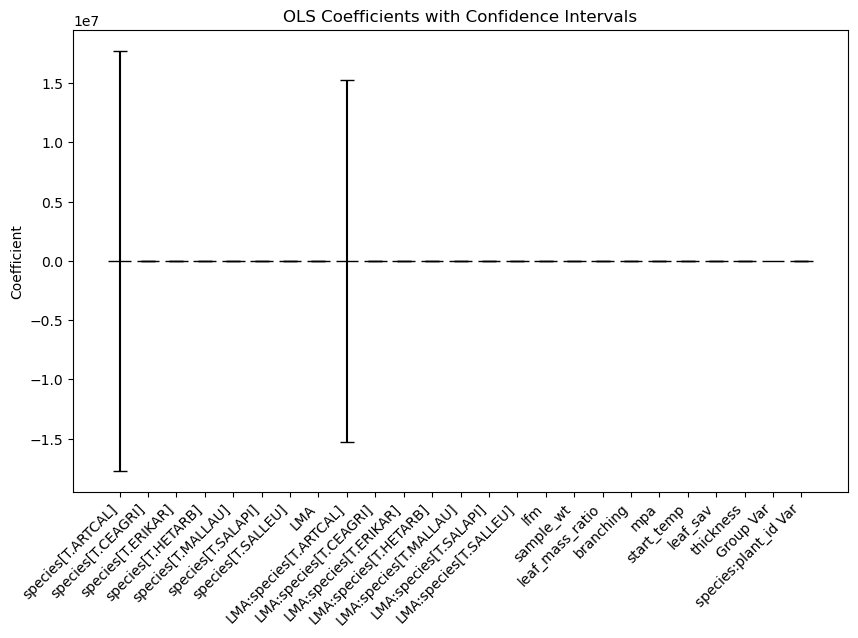

                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        temp_change
No. Observations:          162            Method:                    ML         
No. Groups:                8              Scale:                     0.2155     
Min. group size:           2              Log-Likelihood:            -106.9360  
Max. group size:           37             Converged:                 Yes        
Mean group size:           20.2                                                 
--------------------------------------------------------------------------------
                      Coef.    Std.Err.    z    P>|z|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept              0.636       0.484  1.314 0.189        -0.313        1.584
species[T.ARTCAL]     -4.413 9042864.424 -0.000 1.000 -17723693.002 17723684.175
species[T.CEAGRI]      0.350       0.658  0.532 0.

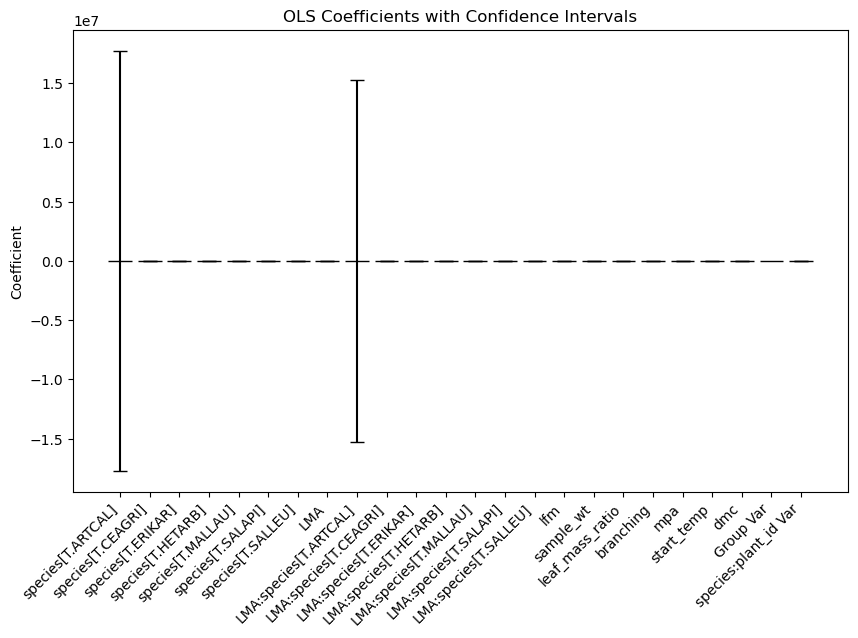

                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        temp_change
No. Observations:          162            Method:                    ML         
No. Groups:                8              Scale:                     0.2137     
Min. group size:           2              Log-Likelihood:            -104.9555  
Max. group size:           37             Converged:                 Yes        
Mean group size:           20.2                                                 
--------------------------------------------------------------------------------
                      Coef.    Std.Err.    z    P>|z|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept              0.534       0.480  1.112 0.266        -0.407        1.475
species[T.ARTCAL]     -0.264 5220900.210 -0.000 1.000 -10232776.642 10232776.113
species[T.CEAGRI]      0.251       0.652  0.384 0.

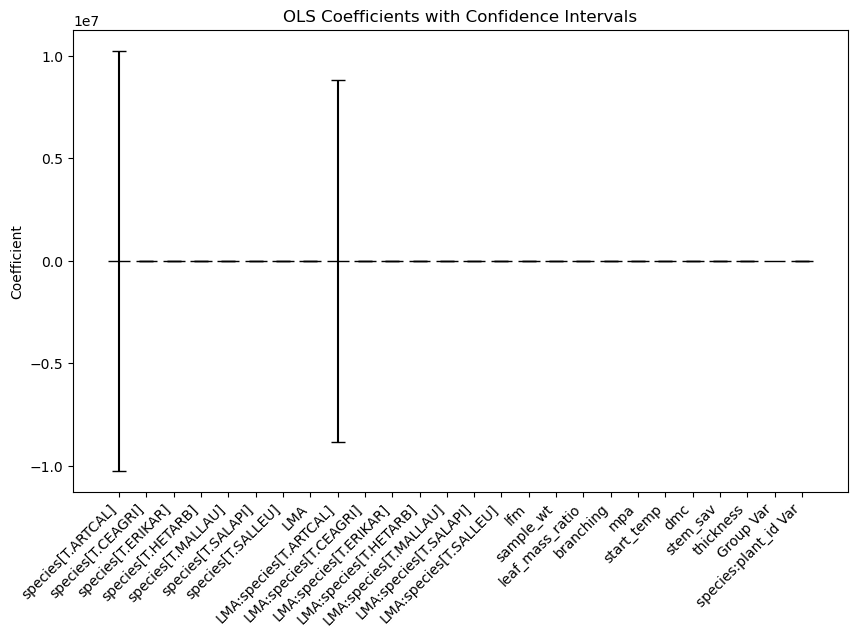

                    Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       temp_change
No. Observations:         162           Method:                   ML         
No. Groups:               8             Scale:                    0.2121     
Min. group size:          2             Log-Likelihood:           -105.0535  
Max. group size:          37            Converged:                Yes        
Mean group size:          20.2                                               
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.768    0.446  1.722 0.085  -0.106  1.642
species[T.ARTCAL]                 -1.052    0.699 -1.505 0.132  -2.423  0.318
species[T.CEAGRI]                 -1.019    0.470 -2.167 0.030  -1.941 -0.097
specie

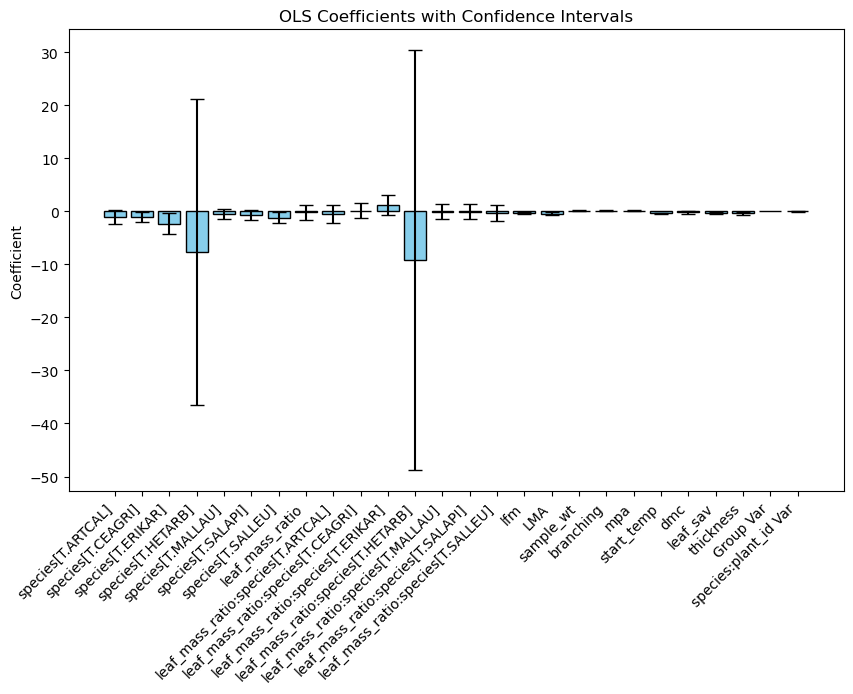

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   temp_change
No. Observations:    162       Method:               ML         
No. Groups:          8         Scale:                0.2140     
Min. group size:     2         Log-Likelihood:       -105.1071  
Max. group size:     37        Converged:            Yes        
Mean group size:     20.2                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.544    0.481  1.132 0.257 -0.398  1.486
species[T.ARTCAL]      2.089                                    
species[T.CEAGRI]      0.216    0.653  0.330 0.741 -1.063  1.495
species[T.ERIKAR]      1.270    1.101  1.153 0.249 -0.889  3.429
species[T.HETARB]     -2.602    2.914 -0.893 0.372 -8.313  3.110
species[T.MALLAU]     -0.208    0.527 -

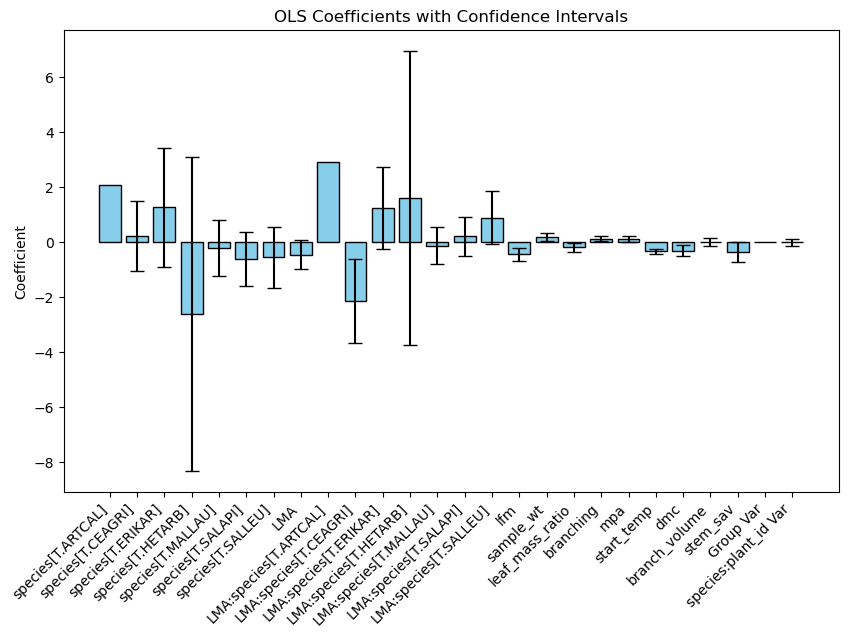

In [12]:
AIC_iterator(flam, cols_use, Y_VAR='temp_change',
            minnumsingle=mns, maxnumsingle=mxs, minnumint=mni, maxnumint=mxi)

# Heat Flux Change

In [13]:
yvar='heat_flux_change'
cols=cols_use
df=flam
compare_predictors_mixedeff(df, cols, yvar)

               cols        aics     pvals         coefs  top_mod
0         thickness  412.755489  0.018575  8.731548e-01     True
1               mpa  411.997205 -0.076142  3.758305e-01     True
2               dmc  410.897627  0.147214  1.630031e-01     True
3           species  410.286512 -1.035451  4.592281e-02    False
4         branching  410.177288  0.127608  1.048537e-01    False
5   leaf_mass_ratio  410.129840 -0.209494  8.185376e-02    False
6          leaf_sav  409.878494 -0.232572  8.228504e-02    False
7        start_temp  408.717362  0.185878  4.241968e-02    False
8               lfm  407.170292 -0.341791  1.955246e-02    False
9          stem_sav  405.824626 -0.375070  1.278106e-03    False
10              LMA  394.396642  0.515376  2.286915e-06    False
11    branch_volume  384.376755  0.397924  7.332081e-09    False
12        sample_wt  329.865131  0.683418  1.428780e-20    False


ERROR: Formula model error: heat_flux_change ~ leaf_sav*thickness

Columns present in sig. interaction terms: {'leaf_mass_ratio', 'branching', 'species'}

Total Num. Cols : Num. Sig. Int. Cols;  13 : 3

Significant Interactions:
('leaf_mass_ratio', 'species')
('branching', 'species')

Number of formulas: 5120
ERROR: Formula model error: heat_flux_change ~ branching*species + LMA
ERROR: Formula model error: heat_flux_change ~ branching*species + mpa
ERROR: Formula model error: heat_flux_change ~ branching*species + stem_sav
ERROR: Formula model error: heat_flux_change ~ branching*species + lfm + LMA
ERROR: Formula model error: heat_flux_change ~ branching*species + lfm + leaf_mass_ratio
ERROR: Formula model error: heat_flux_change ~ branching*species + lfm + dmc
ERROR: Formula model error: heat_flux_change ~ branching*species + lfm + branch_volume
ERROR: Formula model error: heat_flux_change ~ branching*species + lfm + stem_sav
ERROR: Formula model error: heat_flux_change ~ branching*sp

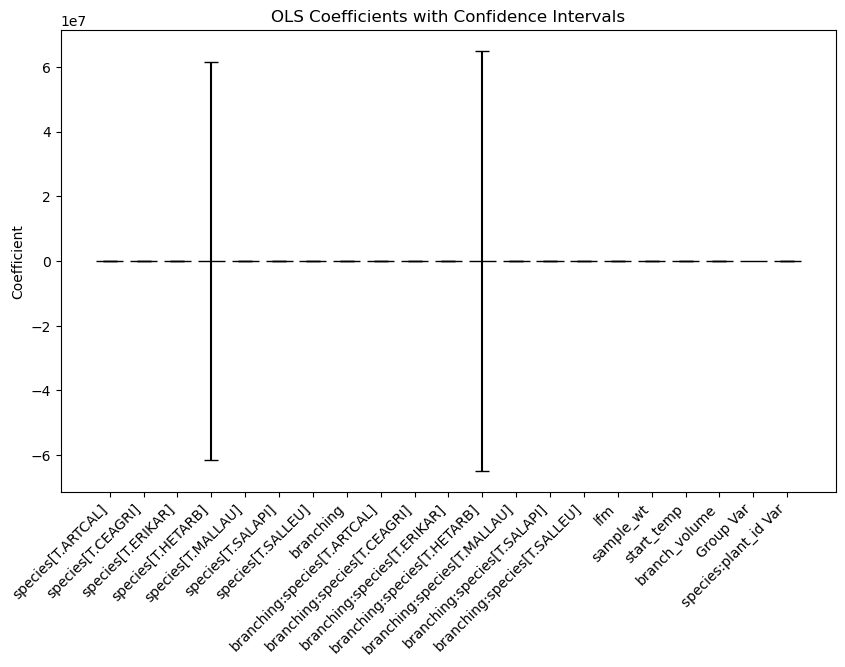

                           Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          heat_flux_change
No. Observations:            162              Method:                      ML              
No. Groups:                  8                Scale:                       0.1771          
Min. group size:             2                Log-Likelihood:              -143.5417       
Max. group size:             37               Converged:                   Yes             
Mean group size:             20.2                                                          
-------------------------------------------------------------------------------------------
                             Coef.     Std.Err.     z    P>|z|     [0.025         0.975]   
-------------------------------------------------------------------------------------------
Intercept                     0.565         0.435  1.297 0.195         -0.289         1.418
species[T.ARTCA

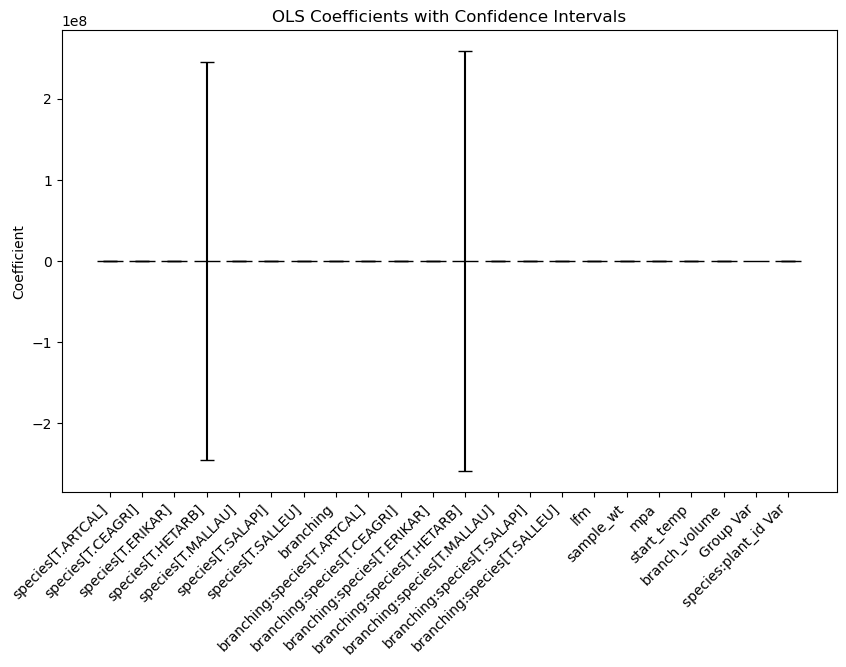

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1925          
Min. group size:       2            Log-Likelihood:          -145.5898       
Max. group size:       37           Converged:               Yes             
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.742    0.782  0.948 0.343  -0.792  2.275
species[T.ARTCAL]                 -1.134    1.206 -0.940 0.347  -3.497  1.229
species[T.CEAGRI]                 -0.739    0.850 -0.870 0.384  -2.405  0.926
specie

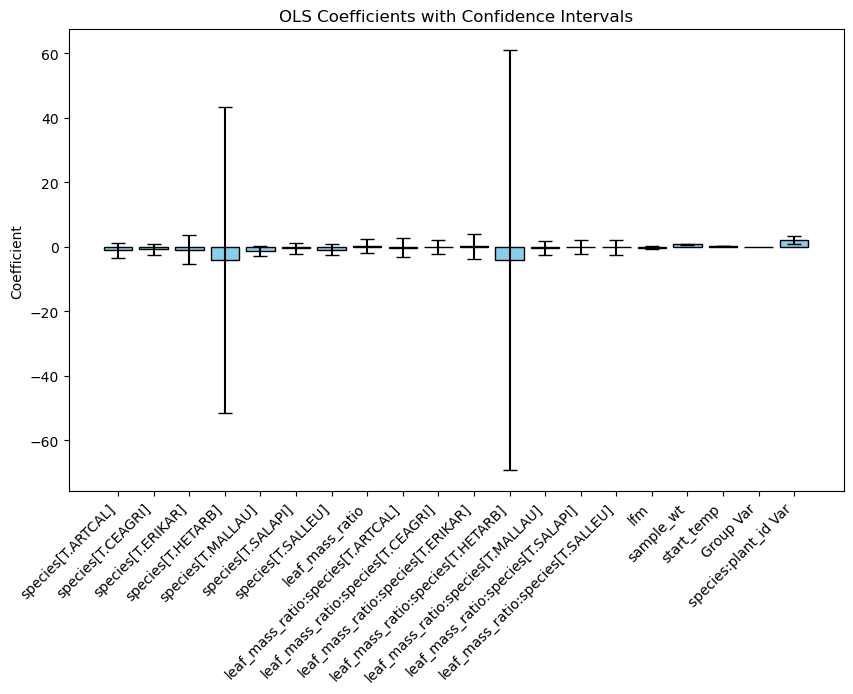

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1967          
Min. group size:       2            Log-Likelihood:          -146.7735       
Max. group size:       37           Converged:               No              
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.661    0.781  0.847 0.397  -0.870  2.193
species[T.ARTCAL]                 -0.882    1.191 -0.740 0.459  -3.216  1.452
species[T.CEAGRI]                 -0.491    0.833 -0.589 0.556  -2.124  1.143
specie

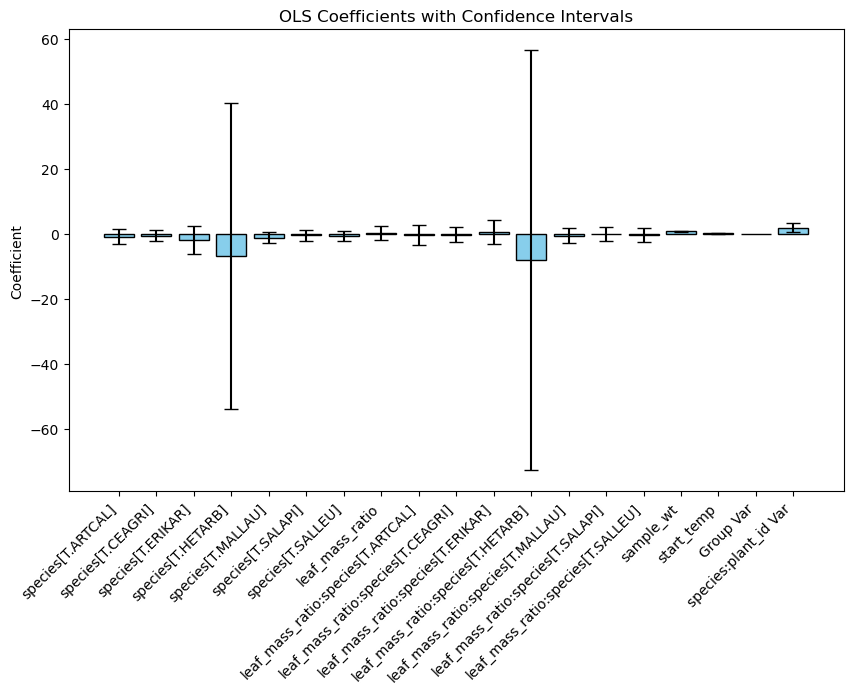

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   heat_flux_change
No. Observations:     162       Method:               ML              
No. Groups:           8         Scale:                0.1848          
Min. group size:      2         Log-Likelihood:       -142.8413       
Max. group size:      37        Converged:            Yes             
Mean group size:      20.2                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.454    0.432  1.052 0.293 -0.392  1.300
species[T.ARTCAL]           -1.023    0.539 -1.898 0.058 -2.080  0.033
species[T.CEAGRI]           -0.720    0.534 -1.350 0.177 -1.767  0.326
species[T.ERIKAR]            0.283    0.657  0.431 0.666 -1.004  1.571
species[T.HETARB]      

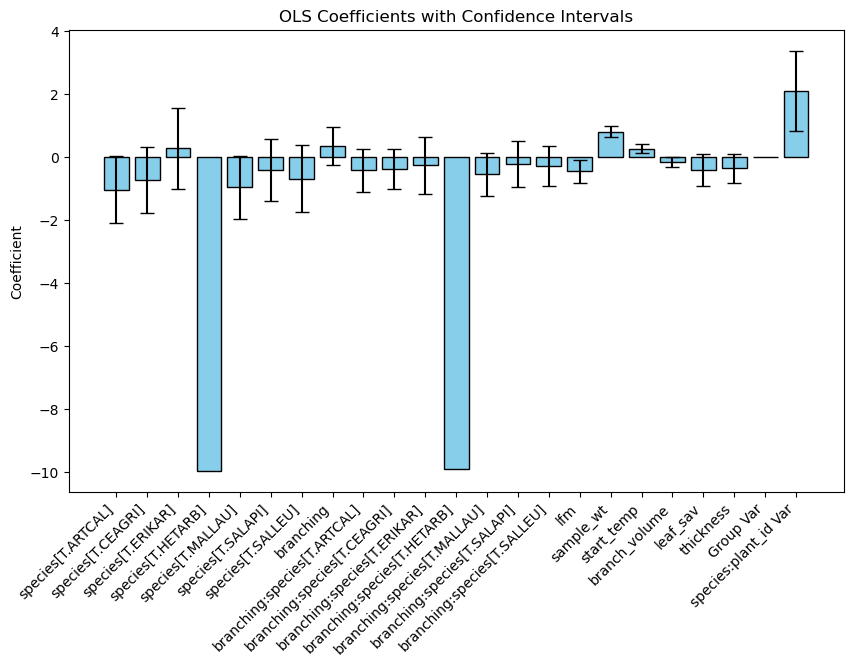

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1858          
Min. group size:       2            Log-Likelihood:          -144.9387       
Max. group size:       37           Converged:               Yes             
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.746    0.796  0.937 0.349  -0.815  2.307
species[T.ARTCAL]                 -1.242    1.230 -1.010 0.312  -3.652  1.168
species[T.CEAGRI]                 -0.806    0.871 -0.926 0.355  -2.513  0.901
specie

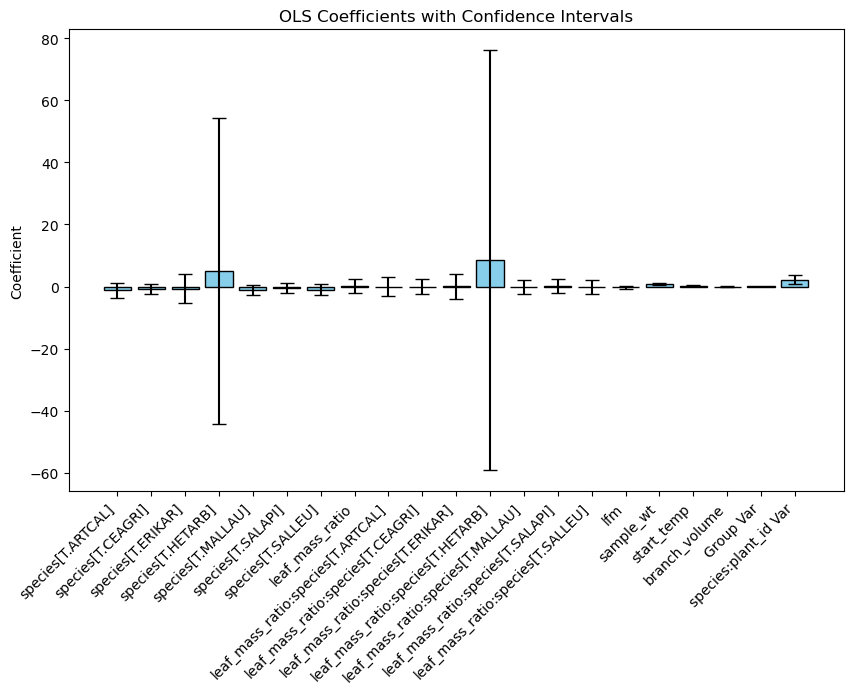

                         Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         heat_flux_change
No. Observations:           162             Method:                     ML              
No. Groups:                 8               Scale:                      0.1918          
Min. group size:            2               Log-Likelihood:             -145.9455       
Max. group size:            37              Converged:                  Yes             
Mean group size:            20.2                                                        
----------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z    P>|z|     [0.025       0.975]   
----------------------------------------------------------------------------------------
Intercept                     0.607        0.433  1.402 0.161        -0.242        1.457
species[T.ARTCAL]            -1.084        0.54

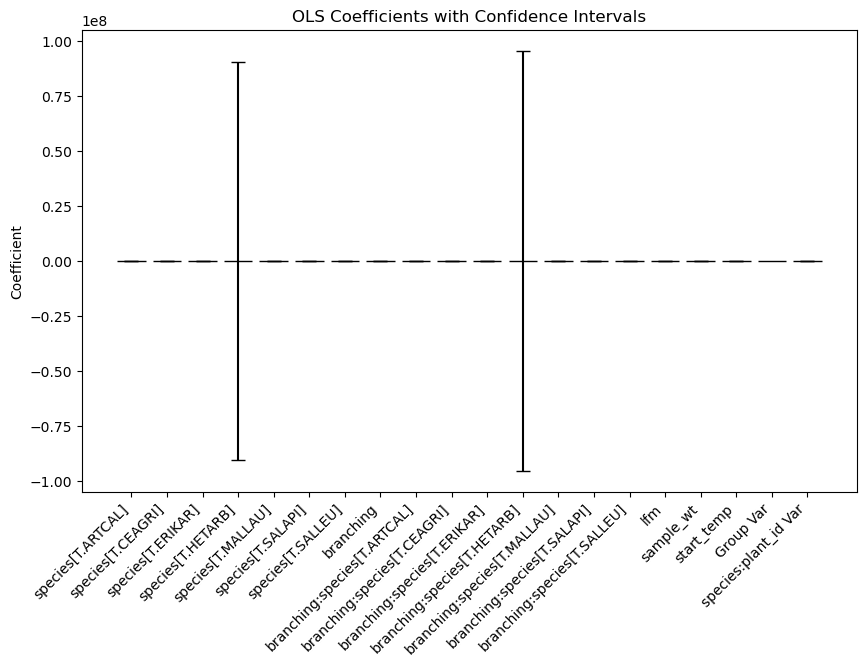

                                     Mixed Linear Model Regression Results
Model:                             MixedLM                 Dependent Variable:                 heat_flux_change
No. Observations:                  162                     Method:                             ML              
No. Groups:                        8                       Scale:                              0.1840          
Min. group size:                   2                       Log-Likelihood:                     -144.0387       
Max. group size:                   37                      Converged:                          Yes             
Mean group size:                   20.2                                                                        
---------------------------------------------------------------------------------------------------------------
                             Coef.        Std.Err.        z    P>|z|         [0.025               0.975]       
-----------------------------

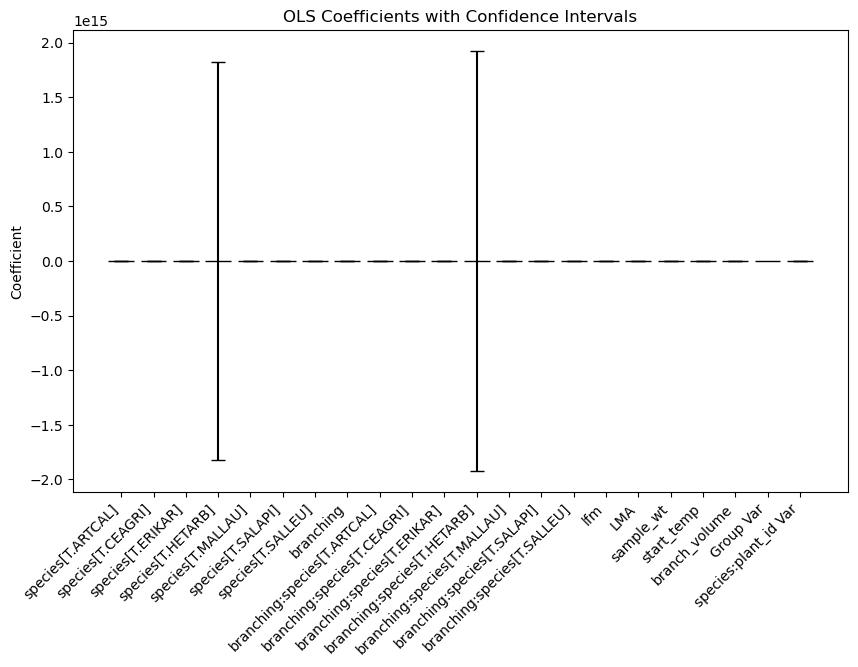

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   heat_flux_change
No. Observations:     162       Method:               ML              
No. Groups:           8         Scale:                0.1789          
Min. group size:      2         Log-Likelihood:       -144.0917       
Max. group size:      37        Converged:            Yes             
Mean group size:      20.2                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.506    0.443  1.142 0.253 -0.362  1.373
species[T.ARTCAL]           -1.157    0.545 -2.122 0.034 -2.225 -0.088
species[T.CEAGRI]           -0.630    0.552 -1.140 0.254 -1.713  0.453
species[T.ERIKAR]           -0.153    0.604 -0.254 0.800 -1.337  1.030
species[T.HETARB]      

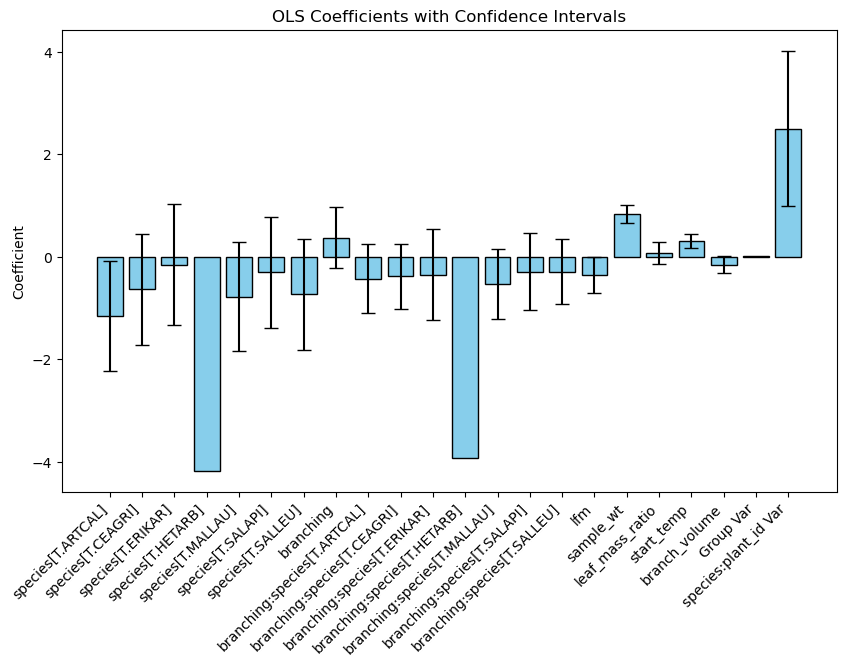

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   heat_flux_change
No. Observations:     162       Method:               ML              
No. Groups:           8         Scale:                0.1810          
Min. group size:      2         Log-Likelihood:       -144.0948       
Max. group size:      37        Converged:            Yes             
Mean group size:      20.2                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.505    0.443  1.139 0.255 -0.364  1.374
species[T.ARTCAL]           -1.063    0.559 -1.903 0.057 -2.158  0.032
species[T.CEAGRI]           -0.624    0.550 -1.136 0.256 -1.702  0.453
species[T.ERIKAR]           -0.045    0.631 -0.072 0.943 -1.281  1.191
species[T.HETARB]      

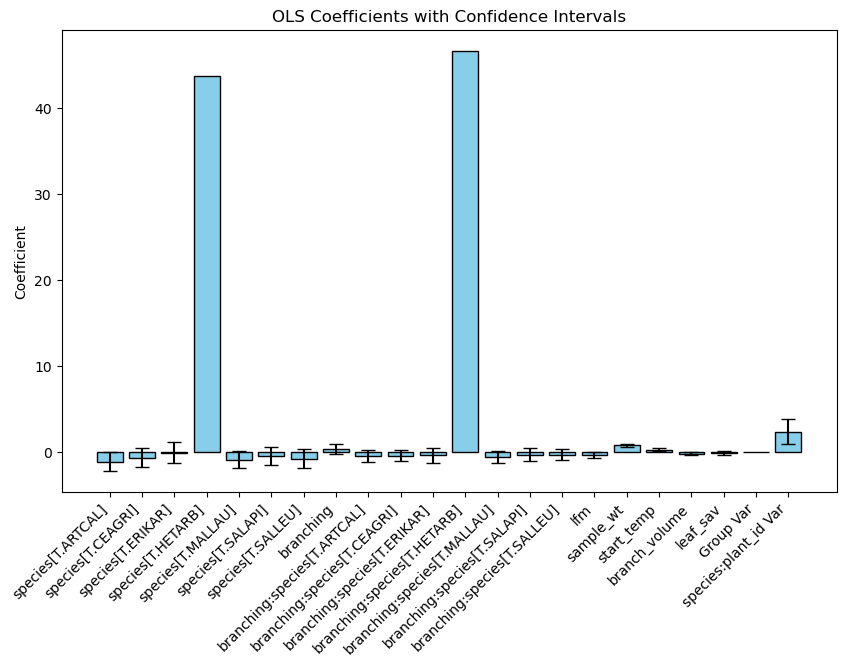

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    heat_flux_change
No. Observations:      162        Method:                ML              
No. Groups:            8          Scale:                 0.1829          
Min. group size:       2          Log-Likelihood:        -144.1052       
Max. group size:       37         Converged:             Yes             
Mean group size:       20.2                                              
-------------------------------------------------------------------------
                              Coef.   Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.564                                    
species[T.ARTCAL]              -1.148                                    
species[T.CEAGRI]              -0.670                                    
species[T.ERIKAR]              -0.160    0.229 -0.698 0.

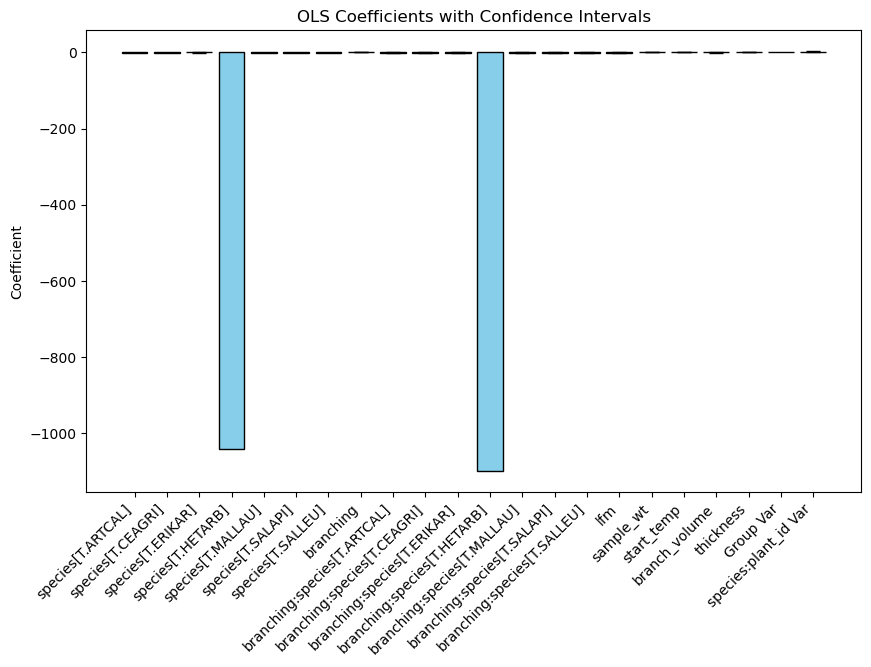

                                     Mixed Linear Model Regression Results
Model:                              MixedLM                 Dependent Variable:                 heat_flux_change
No. Observations:                   162                     Method:                             ML              
No. Groups:                         8                       Scale:                              0.1921          
Min. group size:                    2                       Log-Likelihood:                     -144.1382       
Max. group size:                    37                      Converged:                          No              
Mean group size:                    20.2                                                                        
----------------------------------------------------------------------------------------------------------------
                             Coef.        Std.Err.         z    P>|z|         [0.025               0.975]       
---------------------

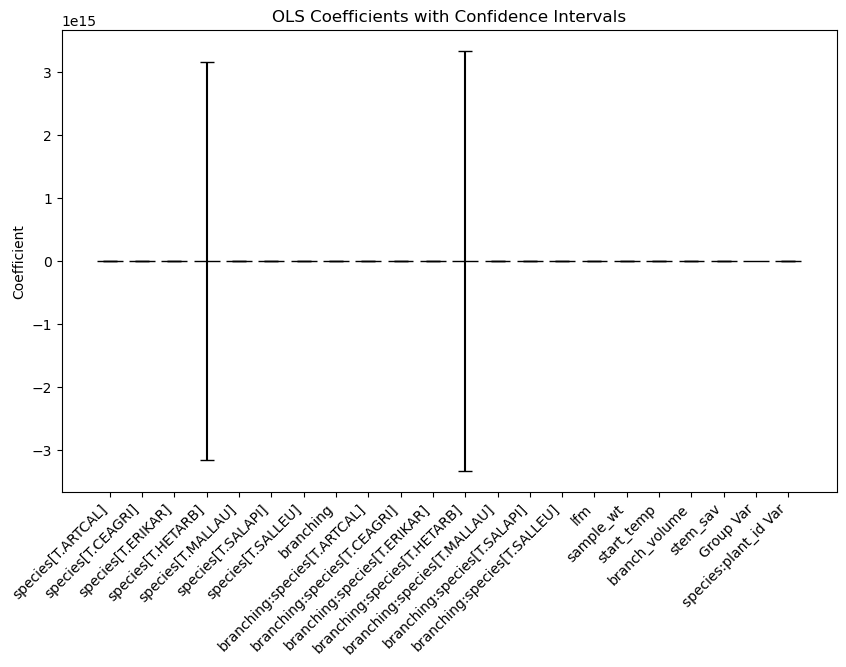

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1898          
Min. group size:       2            Log-Likelihood:          -146.1470       
Max. group size:       37           Converged:               Yes             
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.648    0.796  0.814 0.415  -0.912  2.208
species[T.ARTCAL]                 -0.908    1.216 -0.747 0.455  -3.291  1.475
species[T.CEAGRI]                 -0.482    0.848 -0.568 0.570  -2.144  1.180
specie

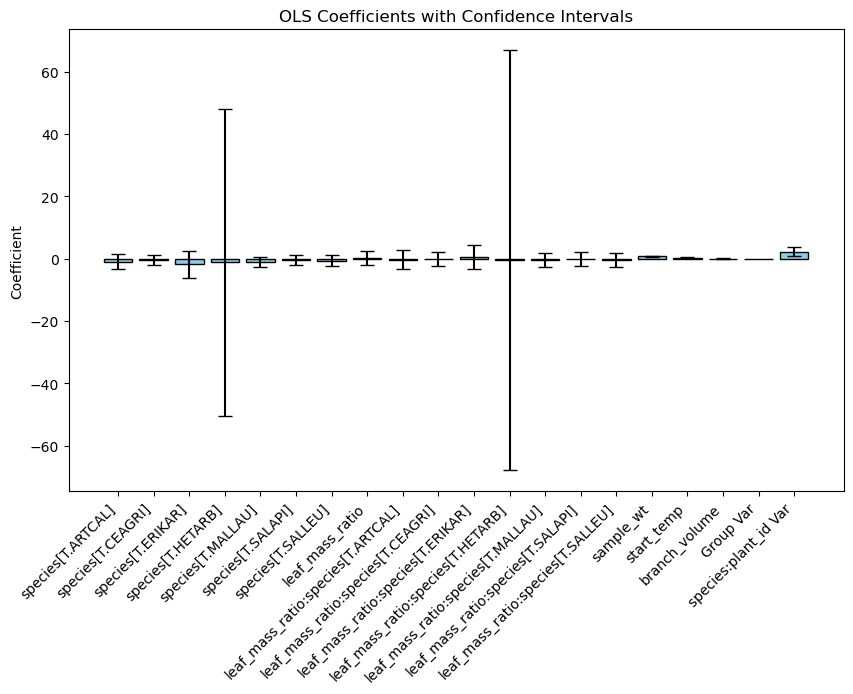

                          Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          heat_flux_change
No. Observations:           162              Method:                      ML              
No. Groups:                 8                Scale:                       0.1932          
Min. group size:            2                Log-Likelihood:              -147.1652       
Max. group size:            37               Converged:                   No              
Mean group size:            20.2                                                          
------------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z    P>|z|     [0.025         0.975]   
------------------------------------------------------------------------------------------
Intercept                     0.600        0.439  1.367 0.172         -0.260         1.460
species[T.ARTCAL]         

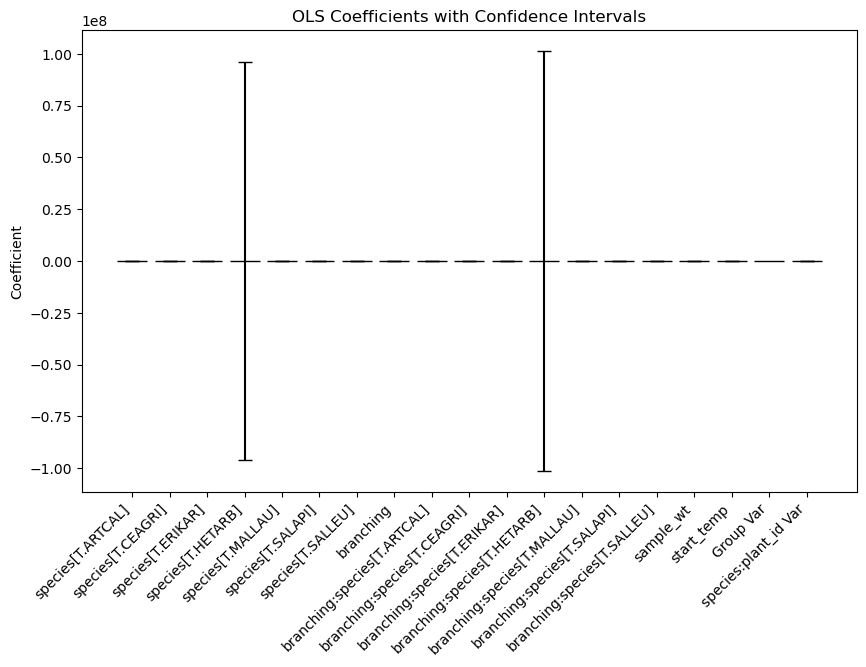

                          Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          heat_flux_change
No. Observations:           162              Method:                      ML              
No. Groups:                 8                Scale:                       0.1857          
Min. group size:            2                Log-Likelihood:              -145.2617       
Max. group size:            37               Converged:                   No              
Mean group size:            20.2                                                          
------------------------------------------------------------------------------------------
                            Coef.     Std.Err.     z    P>|z|     [0.025         0.975]   
------------------------------------------------------------------------------------------
Intercept                    0.618         0.434  1.423 0.155         -0.233         1.469
species[T.ARTCAL]         

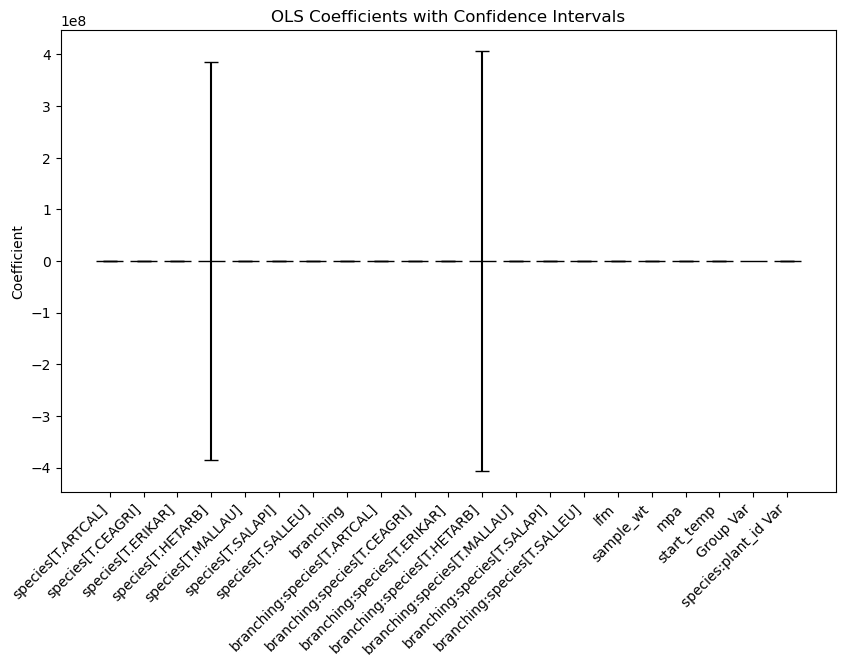

                         Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         heat_flux_change
No. Observations:          162             Method:                     ML              
No. Groups:                8               Scale:                      0.1839          
Min. group size:           2               Log-Likelihood:             -144.2667       
Max. group size:           37              Converged:                  Yes             
Mean group size:           20.2                                                        
---------------------------------------------------------------------------------------
                            Coef.    Std.Err.     z    P>|z|     [0.025       0.975]   
---------------------------------------------------------------------------------------
Intercept                    0.547        0.436  1.255 0.210        -0.307        1.402
species[T.ARTCAL]           -1.133        0.539 -2.101 0.

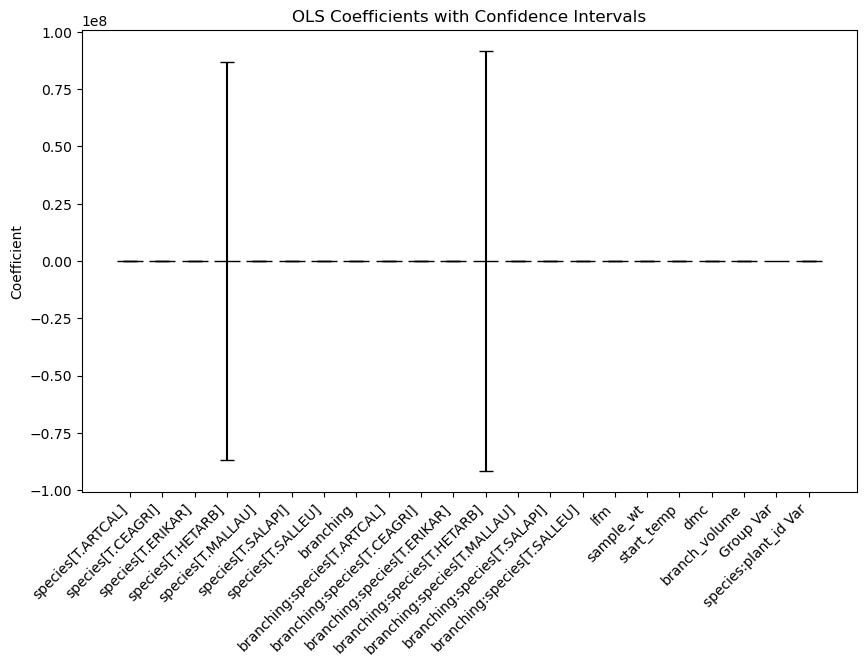

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1894          
Min. group size:       2            Log-Likelihood:          -145.2987       
Max. group size:       37           Converged:               No              
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.781    0.790  0.988 0.323  -0.767  2.329
species[T.ARTCAL]                 -1.125    1.216 -0.925 0.355  -3.509  1.258
species[T.CEAGRI]                 -0.860    0.868 -0.991 0.322  -2.562  0.842
specie

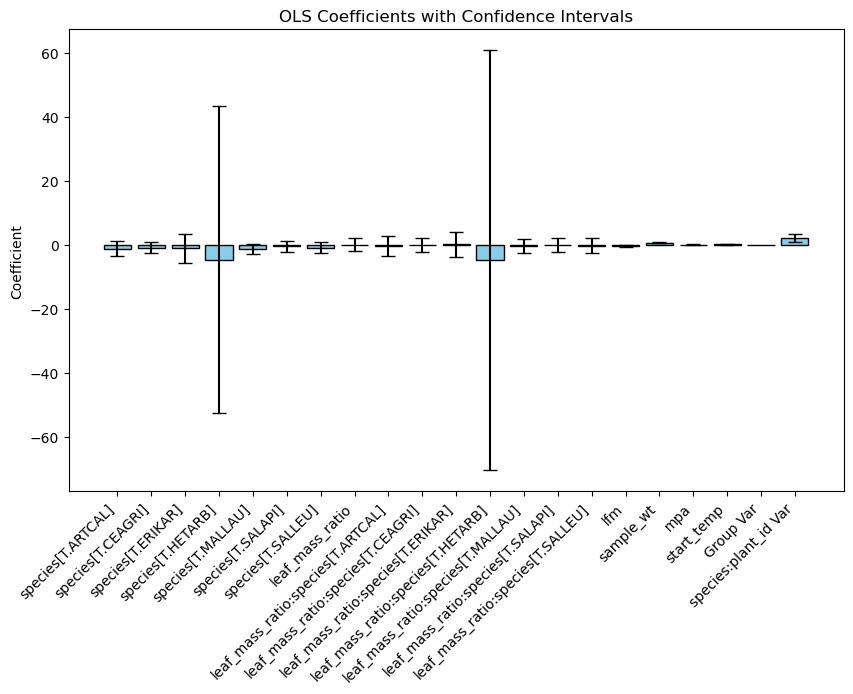

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      heat_flux_change
No. Observations:      162          Method:                  ML              
No. Groups:            8            Scale:                   0.1810          
Min. group size:       2            Log-Likelihood:          -144.3108       
Max. group size:       37           Converged:               No              
Mean group size:       20.2                                                  
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          0.795    0.806  0.986 0.324  -0.785  2.376
species[T.ARTCAL]                 -1.244    1.245 -0.999 0.318  -3.685  1.196
species[T.CEAGRI]                 -0.962    0.891 -1.079 0.280  -2.708  0.784
specie

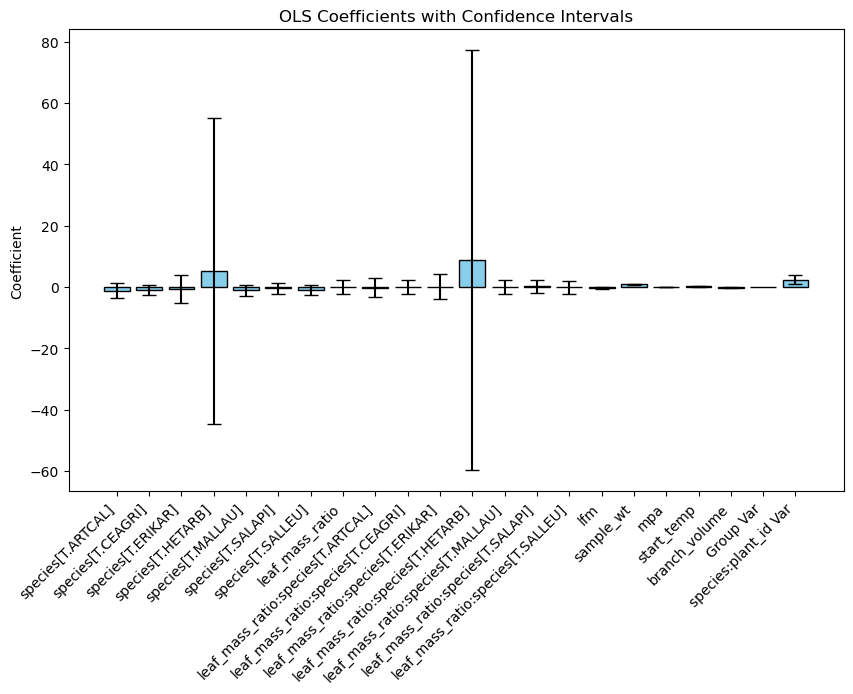

In [14]:
AIC_iterator(flam, cols_use, Y_VAR='heat_flux_change',
            minnumsingle=mns, maxnumsingle=mxs, minnumint=mni, maxnumint=mxi)